# Fates Plant Trait Ensemble Evaluation Against Observations at BCI

The purpose of this testbed code is to compare FATES output to observations at BCI and select ensemble members that best match the observations. This specific version of the code compares the performance of Fates with and without an SLA profile. The analysis can be repeated for the same simulations at two CO2 levels (367 and 400ppm) using the "setcase" toggle in the "Set case,..." box below. These CO2 levels represent the approximate CO2 concentrations at the beginning and end of the observational period.

#### First we will load all the libraries that we need

In [1]:
import netCDF4 as nc4
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dateutil.parser
import datetime
import scipy
from scipy import stats
from scipy.stats import pearsonr

# set the plot style
plt.style.use('seaborn-ticks')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5, "lines.markersize": 6.0, 'lines.markeredgewidth': 1.0})


# Set case, load observations and model output, and calculate annual means


In [2]:
# User specifies which output to analyze here: 
# setcase = 1     runs at 367ppm CO2 
# setcase = 2     runs at 400ppm CO2
# We chose to run at both CO2 levels as they bound the CO2 concentration over the observational time period

setcase = 2

if setcase ==1: # Analyze 367ppm CO2 runs
    
    # Set Case Specific Labels
    casename = 'SLA Profile 367ppm'

    # Set File Paths and Names (for SLA profile simualations)
    filename_h0 = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/fates_clm5_fullmodel_bci_parameter_ensemble_1pft_slaprofile_367ppm_v001.I2000Clm50FatesGs.Cdf9b02d-Fb178808.2018-07-27.h0.ensemble.sofar.nc'
    ## now load the size-structured data.  it is on a second history tape with an annual write frequency
    filename_h1 = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/fates_clm5_fullmodel_bci_parameter_ensemble_1pft_slaprofile_367ppm_v001.I2000Clm50FatesGs.Cdf9b02d-Fb178808.2018-07-27.h1.ensemble.sofar.nc'

    # Set File Paths and Names for control runs
    filename_h0_ctrl = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/fates_clm5_fullmodel_bci_parameter_ensemble_1pft_ctrl_367ppm_v001.I2000Clm50FatesGs.Cdf9b02d-Fb178808.2018-07-27.h0.ensemble.sofar.nc'
    ## now load the size-structured data.  it is on a second history tape with an annual write frequency
    filename_h1_ctrl = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/fates_clm5_fullmodel_bci_parameter_ensemble_1pft_ctrl_367ppm_v001.I2000Clm50FatesGs.Cdf9b02d-Fb178808.2018-07-27.h1.ensemble.sofar.nc'

    # Set Path and Names to save Plots
    heatmap_ylabel = 'Fates Ensemble Members (SLA Profile 367ppm)'
    save_plot_as_dg0 = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile367ppm_Heatmap_Pscore.pdf"
    save_plot_as_dg10 = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile367ppm_Heatmap_PscoreDg10.pdf"
    save_plot_as_dg20 = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile367ppm_Heatmap_PscoreDg20.pdf"
    save_plot_as_skilltraitcovar = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile367ppm_SkillTraitCovar_RankPdg10WeightStrct.jpg"
    save_plot_as_skilltraitcovar_top10 = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile367ppm_SkillTraitCovar_RankPdg10WeightStrct_Top10.jpg"
    save_plot_as_ks_score = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile367ppm_Heatmap_KSscore.pdf"


elif setcase ==2: # Analyze 400ppm CO2 runs

    # Set Case Specific Labels
    casename = 'SLA Profile 400ppm'

    # Set File Paths and Names (for SLA profile simualations)
    filename_h0 = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/fates_clm5_fullmodel_bci_parameter_ensemble_1pft_slaprofile_400ppm_v001.I2000Clm50FatesGs.Cdf9b02d-Fb178808.2018-07-27.h0.ensemble.sofar.nc'
    ## now load the size-structured data.  it is on a second history tape with an annual write frequency
    filename_h1 = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/fates_clm5_fullmodel_bci_parameter_ensemble_1pft_slaprofile_400ppm_v001.I2000Clm50FatesGs.Cdf9b02d-Fb178808.2018-07-27.h1.ensemble.sofar.nc'

    # Set File Paths and Names for control runs
    filename_h0_ctrl = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/fates_clm5_fullmodel_bci_parameter_ensemble_1pft_ctrl_400ppm_v001.I2000Clm50FatesGs.Cdf9b02d-Fb178808.2018-07-27.h0.ensemble.sofar.nc'
    ## now load the size-structured data.  it is on a second history tape with an annual write frequency
    filename_h1_ctrl = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/fates_clm5_fullmodel_bci_parameter_ensemble_1pft_ctrl_400ppm_v001.I2000Clm50FatesGs.Cdf9b02d-Fb178808.2018-07-27.h1.ensemble.sofar.nc'

    # Set Path and Names to save Plots
    heatmap_ylabel = 'Fates Ensemble Members (SLA Profile 400ppm)'
    save_plot_as_dg0 = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile400ppm_Heatmap_Pscore.pdf"
    save_plot_as_dg10 = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile400ppm_Heatmap_PscoreDg10.pdf"
    save_plot_as_dg20 = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile400ppm_Heatmap_PscoreDg20.pdf"
    save_plot_as_skilltraitcovar = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile400ppm_SkillTraitCovar_RankPdg10WeightStrct.jpg"
    save_plot_as_skilltraitcovar_top10 = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile400ppm_SkillTraitCovar_RankPdg10WeightStrct_Top10.jpg"
    save_plot_as_ks_score = "/home/disk/eos3/kovenock/matlab/aim3_fates_lma/plots/fates_ensemble_bci_slaprofile400ppm_Heatmap_KSscore.pdf"


## parameter values
filename_params = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/fates_params_8c32468_bcitraits_test01_v_ensemble.c180605.nc'

# Load Data for sla profile runs
histfile0 = nc4.Dataset(filename_h0)
paramfile = nc4.Dataset(filename_params)
histfile1 = nc4.Dataset(filename_h1)

## Load Data for control runs
histfile0_ctrl = nc4.Dataset(filename_h0_ctrl)
histfile1_ctrl = nc4.Dataset(filename_h1_ctrl)
    

#### Observations

In [3]:
# Load observations for GPP, LH, SH
# This results in arrays with shape(6,12) for:
# gpp_gcm2y = timeseries of monthly mean gpp (gC/m2/yr); averaged across all 30min time points for each month)
# LE_monthyear = timeseries of monthly mean latent heat flux(W/m2);
# H_monthyear = timeseries of monthly mean sensible heat flux (W/m2);

bci_fluxtower_datafilename = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/benchmark_datasets/BCI_v3.1.csv'

bci_fluxtower_data = np.genfromtxt(bci_fluxtower_datafilename, dtype={'names': ('date','tair','RH','vpd','p_kpa','PPT','Rs','Rs_dn','Rl_dn','Rl_up','Rnet','LE','H','Par_tot','Par_diff','SWC','ubar','ustar','WD','gpp','FLAG'),'formats': ('S16','f4','f4','f4','f4','f4','f4','f4','f4','f4','f4','f4','f4','f4','f4','f4','f4','f4','f4','f4','f4')}, delimiter=',', skip_header=2)

ntim = len(bci_fluxtower_data)

time_start = datetime.datetime(2010, 1, 1, 0, 00)

tdelt = np.ma.masked_all(ntim)
month = np.ma.masked_all(ntim, dtype=np.int)
year = np.ma.masked_all(ntim, dtype=np.int)
gpp = np.ma.masked_all(ntim)
LE = np.ma.masked_all(ntim)
H = np.ma.masked_all(ntim)

for i in range(ntim):
    ts = dateutil.parser.parse(bci_fluxtower_data[i][0])
    tdelt[i] = (ts - time_start).days + (ts - time_start).seconds / 86400.
    month[i] = ts.month
    year[i] = ts.year
    gpp[i] = bci_fluxtower_data[i][19]
    LE[i] = bci_fluxtower_data[i][11]
    H[i] = bci_fluxtower_data[i][12]

H_masked = np.ma.masked_invalid(H)

nyears = (year.max() - year.min()) + 1
nmonths = nyears * 12

gpp_monthly = np.ma.masked_all(nmonths)
gpp_monthyear = np.ma.masked_all([nyears,12])
LE_monthyear = np.ma.masked_all([nyears,12])
H_monthyear = np.ma.masked_all([nyears,12])

for i in range(nyears):
    for j in range(12):
        mask = (year[:] == (year.min() + i)) * (month[:] == (j + 1))
        index = i*12 + j
        # gpp_monthly2[index] = gpp[mask].mean()                                                                                                                                                                                                                              
        if mask.sum() > 0:
            gpp_monthly[index] = (gpp * mask).sum() / mask.sum()
            gpp_monthyear[i,j] = gpp_monthly[index]
            LE_monthyear[i,j] = (LE * mask).sum() / mask.sum()
        H_monthyear[i,j] = H_masked[mask].mean()

months = np.arange(12)

### change gpp units to grams or carbon per meter squared per year
gpp_gcm2y = gpp_monthyear * 1e-6 * 12.0107 * (86400 * 365.25)

In [4]:
# Load observations for LAI
# LAI_monthyear = timeseries of monthly LAI (m2/m2) starting with January;
# Note: These are not monthly mean values, rather a snapshot approximately once a month. Means and sd are across 188 locations at BCI.
# Source: Detto et al. 2018, data captured from Fig 7a using GraphClick software

bci_lai_datafilename = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/benchmark_datasets/LAI_Detto2018Obs.csv'
# Monthly Mean
lai_mthts = np.asarray([col[2] for col in (pd.read_csv(bci_lai_datafilename)).values])
# Monthly Means + 2*SD
lai_mthts_p2sd = lai_mthts + 2*(np.asarray([col[7] for col in (pd.read_csv(bci_lai_datafilename)).values]))
# Monthly Means - 2*SD
lai_mthts_m2sd = lai_mthts - 2*(np.asarray([col[7] for col in (pd.read_csv(bci_lai_datafilename)).values]))

# Calculate Annual Mean
# Two versions because have 2yrs+8mths
lai_annmean_janstart = np.nanmean(np.reshape(lai_mthts[:24],(2,12)),1) # Starting in Jan 
lai_annmean_augstart = np.nanmean(np.reshape(lai_mthts[8:24+8],(2,12)),1) # Starting in Sept

In [5]:
# Load observations for Carbon Biomass at BCI
# We use the the range across two different allometries (standard and Chave) from Meakem et al. 2017 (New Phytol) to bracket the overall uncertainty
    # because:  1) they are the most recent estimates; 2) they track only carbon, which is consistent with FATES output.
# However, using a carbon to biomass ratio of 1/2, the census data give a similar range for Mg C/ha.

bci_biomass_datafilename = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/benchmark_datasets/BCI_biomass.csv'

# Total aboveground biomass (Mg biomass/ha) from census data (Baraloto et al. 2012, Biotropica; Feeley et al. 2007, Proc Roy Soc B)
# Years: 2005,1985,1990,1995,2000,2005
agb_biomass_obs = np.asarray([col[1] for col in (pd.read_csv(bci_biomass_datafilename)).values])[:-2,]
# Estimate of carbon biomass from biomass using scaler of 1/2
est_agb_cbiomass = agb_biomass_obs/2 

# Carbon aboveground biomas (Mg C/ha) from Meakem et al. 2017 New Phytol
cbiomass_obs_Mgha = np.asarray([col[2] for col in (pd.read_csv(bci_biomass_datafilename)).values])[-2:,]
# Convert from MgC/ha to KgC/m2
ha_to_m2 = 1/10000
Mg_to_kg = 1000
agb_cbiomass_obs = cbiomass_obs_Mgha * ha_to_m2 * Mg_to_kg

In [6]:
# Load observations for Basal Area at BCI
# Use only the last 5 of the 7 census dates, as the first 2 dates used a different measurment method
filename_ba = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/benchmark_datasets/census_bmks_bci_171208.nc'

# Basal Area (m2/ha)
bafile = nc4.Dataset(filename_ba)
basalarea_bysize = bafile.variables['basal_area_by_size_census'][2:,:,:] # (census number, diameter size class, confidence (0.05,0.5,0.95))
basalarea_obs_wlimits = np.nansum(basalarea_bysize,1) #sum across size classes
# basalarea_obs_wlimits = [lowerlimit, mean, upperlimit] for each census, where limits are range across locations
basalarea_obs = basalarea_obs_wlimits[:,1] # this is the mean basal area value for the whole census site, which we use in this analysis
#basalarea_llimit = basalarea_obs[:,0]
#basalarea_ulimit = basalarea_obs[:,2]

#### Calculate Annual Mean for Observations

In [7]:
# varname_annmean_julystart = 5 annual means starting in July (because observations start in July)
# varname_annmean_augstart = 5 annual means starting in Aug (because observations end in Aug)

# Version 1: Calculate annual means starting in July (because obs start in July)
dif = 6 # throw out first 6 months of the timeseries

var = gpp_gcm2y
var_mthts = np.reshape(var,(1,-1))
var_mthts.shape
var_mthts_difstart = var_mthts[:,dif:dif-12]
var_monthyear_difstart = np.reshape(var_mthts_difstart,(5,12))
var_annmean_difstart = np.nanmean(var_monthyear_difstart,1)
gpp_annmean_julystart = var_annmean_difstart
print(gpp_annmean_julystart)

var = LE_monthyear
var_mthts = np.reshape(var,(1,-1))
var_mthts.shape
var_mthts_difstart = var_mthts[:,dif:dif-12]
var_monthyear_difstart = np.reshape(var_mthts_difstart,(5,12))
var_annmean_difstart = np.nanmean(var_monthyear_difstart,1)
le_annmean_julystart = var_annmean_difstart
print(le_annmean_julystart)

var = H_monthyear
var_mthts = np.reshape(var,(1,-1))
var_mthts.shape
var_mthts_difstart = var_mthts[:,dif:dif-12]
var_monthyear_difstart = np.reshape(var_mthts_difstart,(5,12))
var_annmean_difstart = np.nanmean(var_monthyear_difstart,1)
h_annmean_julystart = var_annmean_difstart
print(h_annmean_julystart)

# Version 2: calculate annual means starting in Aug (because observations end in Aug)
dif = 7 # throw out first 7 months of the timeseries

var = gpp_gcm2y
var_mthts = np.reshape(var,(1,-1))
var_mthts.shape
var_mthts_difstart = var_mthts[:,dif:dif-12]
var_monthyear_difstart = np.reshape(var_mthts_difstart,(5,12))
var_annmean_difstart = np.nanmean(var_monthyear_difstart,1)
gpp_annmean_augstart = var_annmean_difstart
print(gpp_annmean_augstart)

var = LE_monthyear
var_mthts = np.reshape(var,(1,-1))
var_mthts.shape
var_mthts_difstart = var_mthts[:,dif:dif-12]
var_monthyear_difstart = np.reshape(var_mthts_difstart,(5,12))
var_annmean_difstart = np.nanmean(var_monthyear_difstart,1)
le_annmean_augstart = var_annmean_difstart
print(le_annmean_augstart)

var = H_monthyear
var_mthts = np.reshape(var,(1,-1))
var_mthts.shape
var_mthts_difstart = var_mthts[:,dif:dif-12]
var_monthyear_difstart = np.reshape(var_mthts_difstart,(5,12))
var_annmean_difstart = np.nanmean(var_monthyear_difstart,1)
h_annmean_augstart = var_annmean_difstart
print(h_annmean_augstart)


[2737.08248638 2606.79367669 2851.81973399 2734.00238978 2630.37938588]
[75.15923775 74.14869518 74.04685262 71.71978421 80.87098177]
[31.69263887 32.11861236 33.35441726 34.00074938 26.18076703]
[2745.62067296 2638.55363904 2870.83786864 2652.48160759 2663.79197302]
[74.46278255 74.85803967 73.0065992  72.39547603 79.08141294]
[31.71083761 32.7731988  33.44794804 33.16286996 24.74193195]


#### Load Output from Fates Ensemble and Calculate Annual Means

In [8]:
# Set some basic parameters
sample_var = histfile0.variables['GPP']
nens = sample_var.shape[0] # number of ensemble members
nts = sample_var.shape[1] # number of months
nyears = nts/12 # number of years
startyear = nyears-50 # analyzing 50 years
endyear = nyears-1
offset = 7  # first month is actually June, so I need to add this to get to January

# Monthly Timeseries 
# starting with January of startyear+1
fe_gpp_mthts = histfile0.variables['GPP'][:,int(offset+(startyear-1)*12):int(offset+(endyear)*12),0] * 86400 *365
fe_h_mthts = histfile0.variables['FSH'][:,int(offset+(startyear-1)*12):int(offset+(endyear)*12),0]
fe_le_mthts = (histfile0.variables['FCTR'][:,int(offset+(startyear-1)*12):int(offset+(endyear)*12),0]
+histfile0.variables['FGEV'][:,int(offset+(startyear-1)*12):int(offset+(endyear)*12),0]
+histfile0.variables['FCEV'][:,int(offset+(startyear-1)*12):int(offset+(endyear)*12),0])
fe_lai_mthts = histfile0.variables['TLAI'][:,int(offset+(startyear-1)*12):int(offset+(endyear)*12),0]

# Monthly Timeseries by Year
# starting with January of startyear+1
fe_gpp_yrmth = np.reshape(fe_gpp_mthts,(nens,-1,12))
fe_h_yrmth = np.reshape(fe_h_mthts,(nens,-1,12))
fe_le_yrmth = np.reshape(fe_le_mthts,(nens,-1,12))
fe_lai_yrmth = np.reshape(fe_lai_mthts,(nens,-1,12))

# Annual Mean Timeseries
fe_gpp_annmeants = np.nanmean(fe_gpp_yrmth,axis=2) 
fe_h_annmeants = np.nanmean(fe_h_yrmth,axis=2) 
fe_le_annmeants = np.nanmean(fe_le_yrmth,axis=2)
fe_lai_annmeants = np.nanmean(fe_lai_yrmth,axis=2)

# Annual Value Timeseries
# Load agb by size class, then sum across size classes
fe_agb_annts = np.squeeze(np.nansum((histfile1.variables['AGB_SCLS'][:,int(startyear-1):int(endyear),:]),axis=2)) # kgC/m2
fe_ba_annts = np.squeeze(np.nansum((histfile1.variables['BA_SCLS'][:,int(startyear-1):int(endyear),:]),axis=2)) # m2/ha


# Plot Histograms to Compare Control vs. Experiment Ensemble Distributions
Here we plot the distributions of annual mean variables for each ensemble member for sla profile and control simulations.

In [9]:
# Set some basic measures for the control simulations
sample_var_ctrl = histfile0_ctrl.variables['GPP']
nens = sample_var_ctrl.shape[0] # number of ensemble members
nts_ctrl= sample_var_ctrl.shape[1] # number of months
nyears_ctrl = nts_ctrl/12 # number of years
startyear_ctrl = nyears_ctrl-50 # analyzing 50 years
endyear_ctrl = nyears_ctrl-1

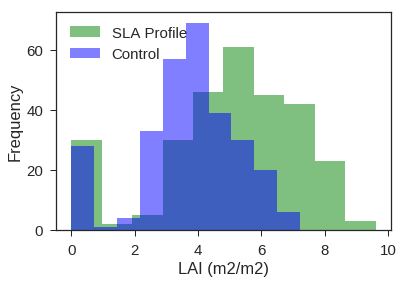

In [10]:
#LAI
mean_var = histfile0.variables['TLAI'][:,int(startyear*12):int(endyear*12),0].mean(axis=1)
mean_var_ctrl = histfile0_ctrl.variables['TLAI'][:,int(startyear_ctrl*12):int(endyear_ctrl*12),0].mean(axis=1)

plt.hist(mean_var, alpha =0.5, color = 'g')
plt.hist(mean_var_ctrl, alpha =0.5, color = 'b')
# or plot with bars side-by-side
#colors = ['b','g']
#plt.hist([mean_var,mean_var_ctrl],alpha=0.5,color=colors)
plt.ylabel('Frequency')
plt.legend(('SLA Profile','Control'),loc='upper left')

plt.xlabel('LAI (m2/m2)')
plt.show() 

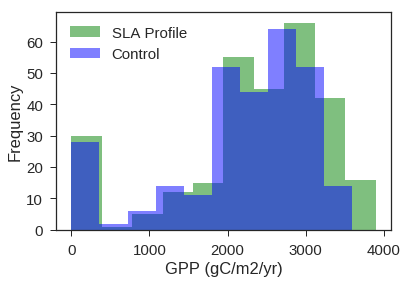

In [11]:
#GPP
mean_var = (histfile0.variables['GPP'][:,int(offset+(startyear-1)*12):int(offset+(endyear)*12),0] * 86400 *365).mean(axis=1)
mean_var_ctrl = (histfile0_ctrl.variables['GPP'][:,int(offset+(startyear_ctrl-1)*12):int(offset+(endyear_ctrl)*12),0] * 86400 *365).mean(axis=1)

plt.hist(mean_var, alpha =0.5, color = 'g')
plt.hist(mean_var_ctrl, alpha =0.5, color = 'b')
# or plot with bars side-by-side
#colors = ['b','g']
#plt.hist([mean_var,mean_var_ctrl],alpha=0.5,color=colors)
plt.ylabel('Frequency')
plt.legend(('SLA Profile','Control'),loc='upper left')

plt.xlabel('GPP (gC/m2/yr)')
plt.show() 

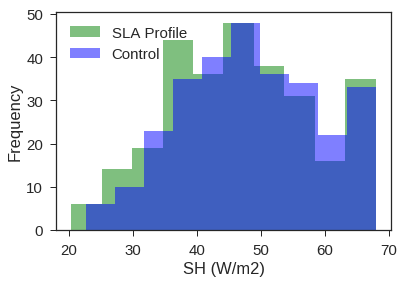

In [12]:
#SH
mean_var = histfile0.variables['FSH'][:,int(offset+(startyear-1)*12):int(offset+(endyear)*12),0].mean(axis=1)
mean_var_ctrl = histfile0_ctrl.variables['FSH'][:,int(offset+(startyear_ctrl-1)*12):int(offset+(endyear_ctrl)*12),0].mean(axis=1)

plt.hist(mean_var, alpha =0.5, color = 'g')
plt.hist(mean_var_ctrl, alpha =0.5, color = 'b')
# or plot with bars side-by-side
#colors = ['b','g']
#plt.hist([mean_var,mean_var_ctrl],alpha=0.5,color=colors)
plt.ylabel('Frequency')
plt.legend(('SLA Profile','Control'),loc='upper left')

plt.xlabel('SH (W/m2)')
plt.show() 

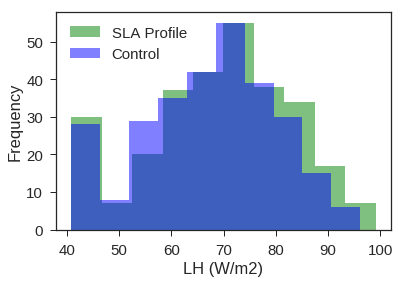

In [13]:
#LH
mean_var = (histfile0.variables['FCTR'][:,int(offset+(startyear-1)*12):int(offset+(endyear)*12),0]
+histfile0.variables['FGEV'][:,int(offset+(startyear-1)*12):int(offset+(endyear)*12),0]
+histfile0.variables['FCEV'][:,int(offset+(startyear-1)*12):int(offset+(endyear)*12),0]).mean(axis=1)

mean_var_ctrl = (histfile0_ctrl.variables['FCTR'][:,int(offset+(startyear_ctrl-1)*12):int(offset+(endyear_ctrl)*12),0]
+histfile0_ctrl.variables['FGEV'][:,int(offset+(startyear_ctrl-1)*12):int(offset+(endyear_ctrl)*12),0]
+histfile0_ctrl.variables['FCEV'][:,int(offset+(startyear_ctrl-1)*12):int(offset+(endyear_ctrl)*12),0]).mean(axis=1)

plt.hist(mean_var, alpha =0.5, color = 'g')
plt.hist(mean_var_ctrl, alpha =0.5, color = 'b')
# or plot with bars side-by-side
#colors = ['b','g']
#plt.hist([mean_var,mean_var_ctrl],alpha=0.5,color=colors)
plt.ylabel('Frequency')
plt.legend(('SLA Profile','Control'),loc='upper left')

plt.xlabel('LH (W/m2)')
plt.show() 

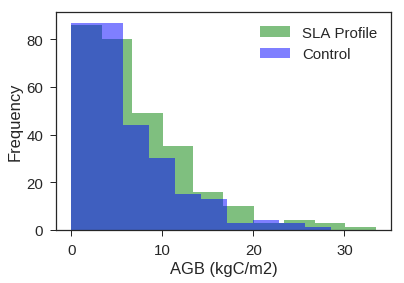

In [14]:
#AGB
# Sum over size classes before taking mean; Note that this variable is indexed by years rather than months
mean_var = (np.squeeze(np.nansum((histfile1.variables['AGB_SCLS'][:,int(startyear-1):int(endyear),:]),axis=2))).mean(axis=1) # kgC/m2
mean_var_ctrl = (np.squeeze(np.nansum((histfile1_ctrl.variables['AGB_SCLS'][:,int(startyear_ctrl-1):int(endyear_ctrl),:]),axis=2))).mean(axis=1) # kgC/m2

plt.hist(mean_var, alpha =0.5, color = 'g')
plt.hist(mean_var_ctrl, alpha =0.5, color = 'b')
# or plot with bars side-by-side
#colors = ['b','g']
#plt.hist([mean_var,mean_var_ctrl],alpha=0.5,color=colors)
plt.ylabel('Frequency')
plt.legend(('SLA Profile','Control'),loc='upper right')

plt.xlabel('AGB (kgC/m2)')
plt.show() 


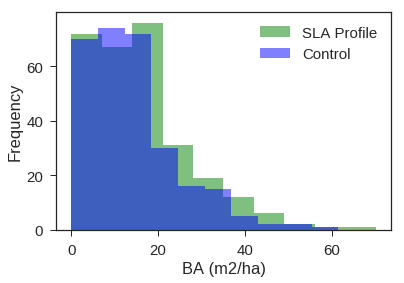

In [15]:
#BA
mean_var = (np.squeeze(np.nansum((histfile1.variables['BA_SCLS'][:,int(startyear-1):int(endyear),:]),axis=2))).mean(axis=1) # m2/ha
mean_var_ctrl = (np.squeeze(np.nansum((histfile1_ctrl.variables['BA_SCLS'][:,int(startyear_ctrl-1):int(endyear_ctrl),:]),axis=2))).mean(axis=1) # m2/ha

plt.hist(mean_var, alpha =0.5, color = 'g')
plt.hist(mean_var_ctrl, alpha =0.5, color = 'b')
# or plot with bars side-by-side
#colors = ['b','g']
#plt.hist([mean_var,mean_var_ctrl],alpha=0.5,color=colors)
plt.ylabel('Frequency')
plt.legend(('SLA Profile','Control'),loc='upper right')

plt.xlabel('BA (m2/ha)')
plt.show() 

# Plot Histograms of Observations for each Variable.
TO DO:  I would like to remove this section and instead indicate the observational bounds and mean values on the histograms of fates output above.

lai_annmean_janstart = [5.78858333 5.87258333]


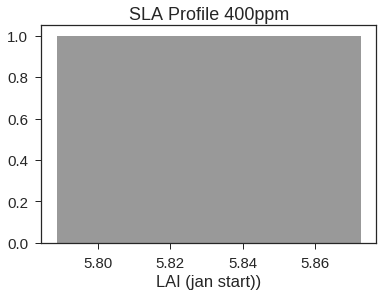

In [16]:
# Histograms of observations
var = lai_annmean_janstart
var_series = pd.Series(var, name='LAI (jan start))')
hp = sns.distplot(var_series, kde=False, rug=False, color="k")
#hp.set(ylim=(0,None))
#hp.set(xlim=(40,100))
hp.set(title=casename)
print("lai_annmean_janstart =",lai_annmean_janstart)

lai_annmean_augstart = [5.78716667 6.2115    ]


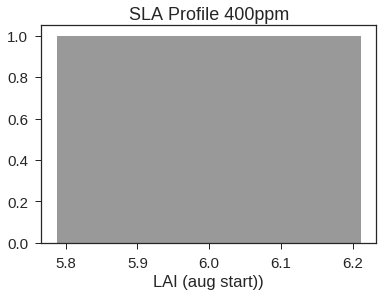

In [17]:
# Histograms of observations

var = lai_annmean_augstart
var_series = pd.Series(var, name='LAI (aug start))')
hp = sns.distplot(var_series, kde=False, rug=False, color="k")
#hp.set(ylim=(0,None))
#hp.set(xlim=(40,100))
hp.set(title=casename)
print("lai_annmean_augstart =",lai_annmean_augstart)

gpp_annmean_julstart = [2737.08248638 2606.79367669 2851.81973399 2734.00238978 2630.37938588]


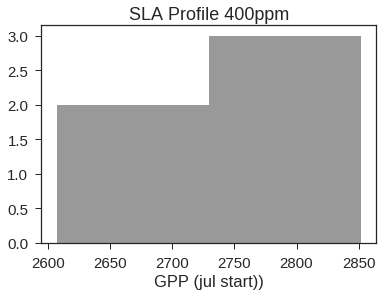

In [18]:
# Histograms of observations

var = gpp_annmean_julystart
var_series = pd.Series(var, name='GPP (jul start))')
hp = sns.distplot(var_series, kde=False, rug=False, color="k")
#hp.set(ylim=(0,None))
#hp.set(xlim=(40,100))
hp.set(title=casename)
print("gpp_annmean_julstart =",var)

le_annmean_julstart = [75.15923775 74.14869518 74.04685262 71.71978421 80.87098177]


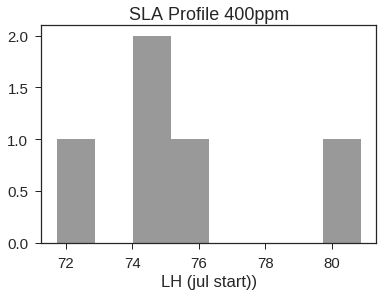

In [19]:
# Histograms of observations

var = le_annmean_julystart
var_series = pd.Series(var, name='LH (jul start))')
hp = sns.distplot(var_series, kde=False, rug=False, color="k")
#hp.set(ylim=(0,None))
#hp.set(xlim=(40,100))
hp.set(title=casename)
print("le_annmean_julstart =",var)

h_annmean_julstart = [31.69263887 32.11861236 33.35441726 34.00074938 26.18076703]


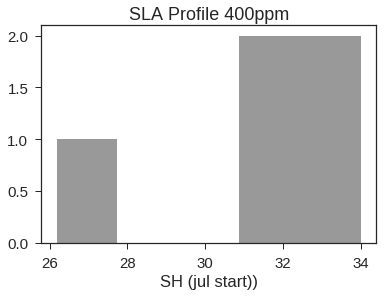

In [20]:
# Histograms of observations

var = h_annmean_julystart
var_series = pd.Series(var, name='SH (jul start))')
hp = sns.distplot(var_series, kde=False, rug=False, color="k")
#hp.set(ylim=(0,None))
#hp.set(xlim=(40,100))
hp.set(title=casename)
print("h_annmean_julstart =",var)

basalarea_obs = [32.59703  32.623383 32.939354 32.69145  32.741177]


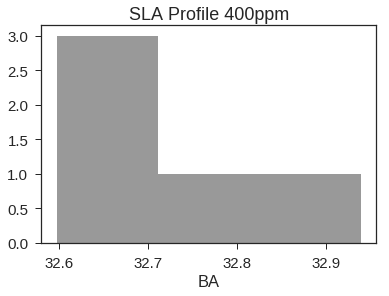

In [21]:
# Histograms of observations

var = basalarea_obs
var_series = pd.Series(var, name='BA')
hp = sns.distplot(var_series, kde=False, rug=False, color="k")
#hp.set(ylim=(0,None))
#hp.set(xlim=(40,100))
hp.set(title=casename)
print("basalarea_obs =",var)

agb_cbiomass_obs = [13.6 16. ]


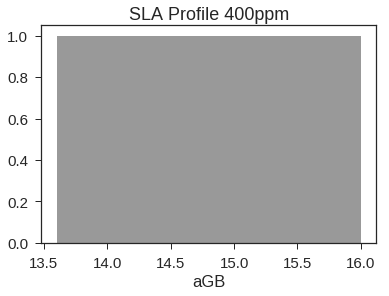

In [22]:
# Histograms of observations

var = agb_cbiomass_obs
var_series = pd.Series(var, name='aGB')
hp = sns.distplot(var_series, kde=False, rug=False, color="k")
#hp.set(ylim=(0,None))
#hp.set(xlim=(40,100))
hp.set(title=casename)
print("agb_cbiomass_obs =",var)

# Evaluate the skill of each SLA Profile Ensemble Member

# Skill Score Measure #1:  Pscore
Measures the % of model annual means that fall within observed range for each ensemble member.

The range is defined as the minimum and maximum across observations. We also trying a degraded observed range (10% and 20% in each direction) to account for measurement error.


In [23]:
# Calculate pscore for each variable [using observed range, observed range with 10% degradation, observed range with 20% degradation]

#Pscore Calculation
#pscore[:,0] = pscore for observed range; 
#pscore[:,1] = pscore for observed range degraded by 10%; 
#pscore[:,2] = pscore for observed range degraded by 20%;
def pscore_calc(ens_ts,obs_min,obs_max,nens,startyear,endyear):
    #Where ens_ts = fates ensemble members time series
    #Degrade observed range:
    dg1 = 0.10
    dg2 = 0.20
    obsmin = np.stack((obs_min,(1-dg1)*obs_min,(1-dg2)*obs_min),axis = 0)
    obsmax = np.stack((obs_max,(1+dg1)*obs_max,(1+dg2)*obs_max),axis = 0)
    #Calculate pscores for observed and degraded ranges
    pscore = np.ma.masked_all([nens,3])
    test_ann_range = np.ma.masked_all([nens,3])
    for i in range(nens):
        for j in range(3):
            nyears = endyear-startyear+1
            test_ann_range[i,j] = (ens_ts[i,:] < obsmin[j]).sum()+(ens_ts[i,:] > obsmax[j]).sum()
            pscore[i,j] = 100 - 100*test_ann_range[i,j]/(nyears)
    return pscore

# Leaf Area Index
lai_annmean_min = np.nanmin(np.stack((lai_annmean_janstart,lai_annmean_augstart), axis = 1))
lai_annmean_max = np.nanmax(np.stack((lai_annmean_janstart,lai_annmean_augstart), axis = 1))
pscore_lai = pscore_calc(fe_lai_annmeants,lai_annmean_min,lai_annmean_max,nens,startyear,endyear)

# Aboveground Biomass (kgC/m2)
agb_min = np.nanmin(agb_cbiomass_obs)
agb_max = np.nanmax(agb_cbiomass_obs)
pscore_agb = pscore_calc(fe_agb_annts,agb_min,agb_max,nens,startyear,endyear)

# Basal Area (m2/ha)
ba_min = np.nanmin(basalarea_obs) # This returns the min of the lower 95 CI values
ba_max = np.nanmax(basalarea_obs) # This returns the min of the upper 95 CI values
pscore_ba = pscore_calc(fe_ba_annts,ba_min,ba_max,nens,startyear,endyear)

# GPP
gpp_annmean_min = np.nanmin(np.stack((gpp_annmean_julystart,gpp_annmean_augstart), axis = 1))
gpp_annmean_max = np.nanmax(np.stack((gpp_annmean_julystart,gpp_annmean_augstart), axis = 1))
pscore_gpp= pscore_calc(fe_gpp_annmeants,gpp_annmean_min,gpp_annmean_max,nens,startyear,endyear)

# Latent heat
le_annmean_min = np.nanmin(np.stack((le_annmean_julystart,le_annmean_augstart), axis = 1))
le_annmean_max = np.nanmax(np.stack((le_annmean_julystart,le_annmean_augstart), axis = 1))
pscore_le = pscore_calc(fe_le_annmeants,le_annmean_min,le_annmean_max,nens,startyear,endyear)

# Sensible heat
h_annmean_min = np.nanmin(np.stack((h_annmean_julystart,h_annmean_augstart), axis = 1))
h_annmean_max = np.nanmax(np.stack((h_annmean_julystart,h_annmean_augstart), axis = 1))
pscore_h = pscore_calc(fe_h_annmeants,h_annmean_min,h_annmean_max,nens,startyear,endyear)

#### Heatmaps of Pscores

set

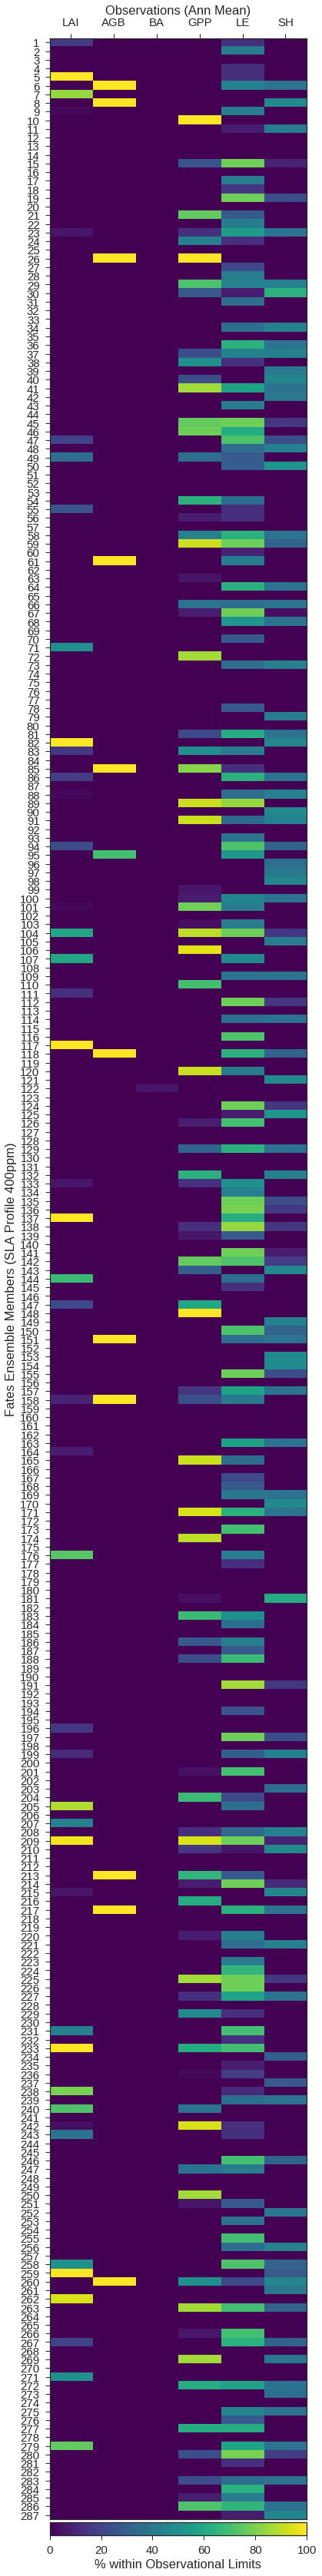

In [24]:
#Heatmap for Pscore (no degradation of observed range)
# Set level of degradation for this heatmap (0 = none, 1= 10%, 2 = 20%)
dgind = 0 
heatdata = (np.stack((
    pscore_lai[:,dgind],
    pscore_agb[:,dgind],
    pscore_ba[:,dgind],
    pscore_gpp[:,dgind],
    pscore_le[:,dgind],
    pscore_h[:,dgind]),
    axis=1))

ens = [str(x) for x in range(1,288)]
obs = ["LAI",
       "AGB",
       "BA",
       "GPP",
       "LE",
       "SH"]

fig, ax = plt.subplots(figsize=(6,70))
im = ax.imshow(heatdata,cmap="viridis",aspect='auto')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax,orientation="horizontal", pad=0.001)
cbar.ax.set_xlabel('% within Observational Limits')

ax.set_xlabel('Observations (Ann Mean)')
ax.set_xticks(np.arange(len(obs)))
ax.xaxis.tick_top()
ax.set_xticklabels(obs)
ax.xaxis.set_label_position('top')

ax.set_ylabel(heatmap_ylabel)
ax.set_yticks(np.arange(len(ens)))
ax.set_yticklabels(ens)
set

In [25]:
# save image
fig.savefig(save_plot_as_dg0, bbox_inches='tight')

set

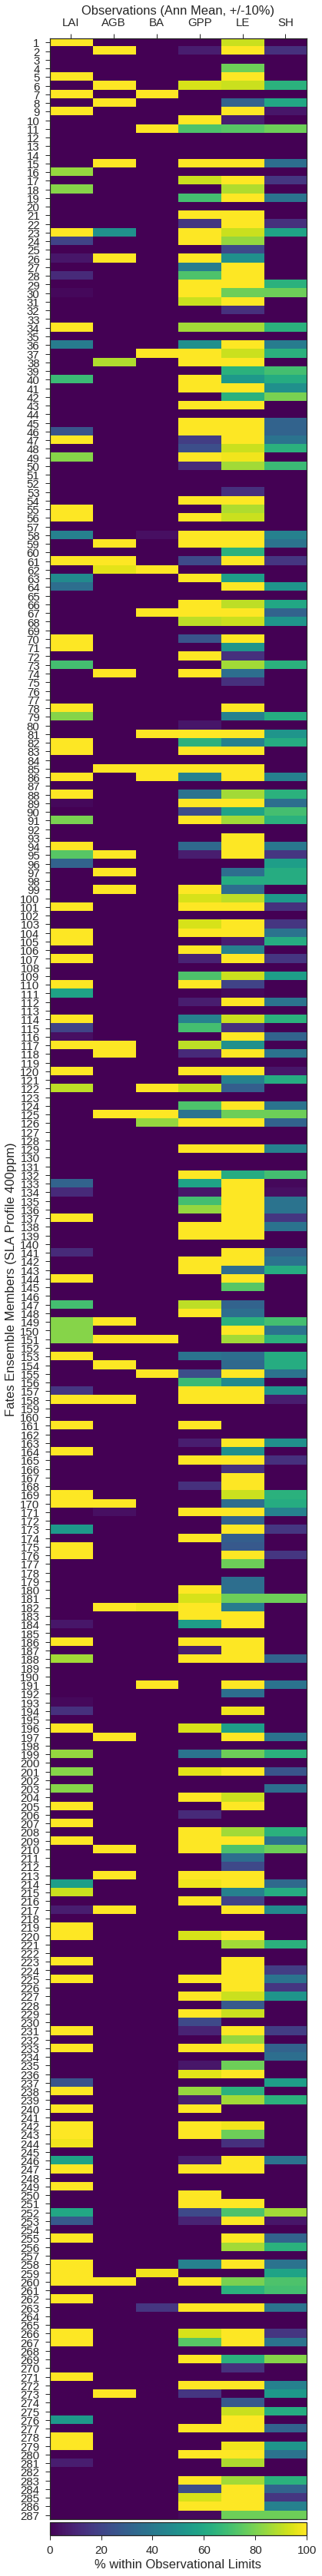

In [26]:
#Heatmap for Pscore (10% degradation of observed range)
# Set level of degradation for this heatmap (0 = none, 1= 10%, 2 = 20%)
dgind = 1
heatdata = (np.stack((
    pscore_lai[:,dgind],
    pscore_agb[:,dgind],
    pscore_ba[:,dgind],
    pscore_gpp[:,dgind],
    pscore_le[:,dgind],
    pscore_h[:,dgind]),
    axis=1))

ens = [str(x) for x in range(1,288)]
obs = ["LAI",
       "AGB",
       "BA",
       "GPP",
       "LE",
       "SH"]

fig, ax = plt.subplots(figsize=(6,70))
im = ax.imshow(heatdata,cmap="viridis",aspect='auto')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax,orientation="horizontal", pad=0.001)
cbar.ax.set_xlabel('% within Observational Limits')

ax.set_xlabel('Observations (Ann Mean, +/-10%)')
ax.set_xticks(np.arange(len(obs)))
ax.xaxis.tick_top()
ax.set_xticklabels(obs)
ax.xaxis.set_label_position('top')

ax.set_ylabel(heatmap_ylabel)
ax.set_yticks(np.arange(len(ens)))
ax.set_yticklabels(ens)
set

In [27]:
# save image
fig.savefig(save_plot_as_dg10, bbox_inches='tight')

set

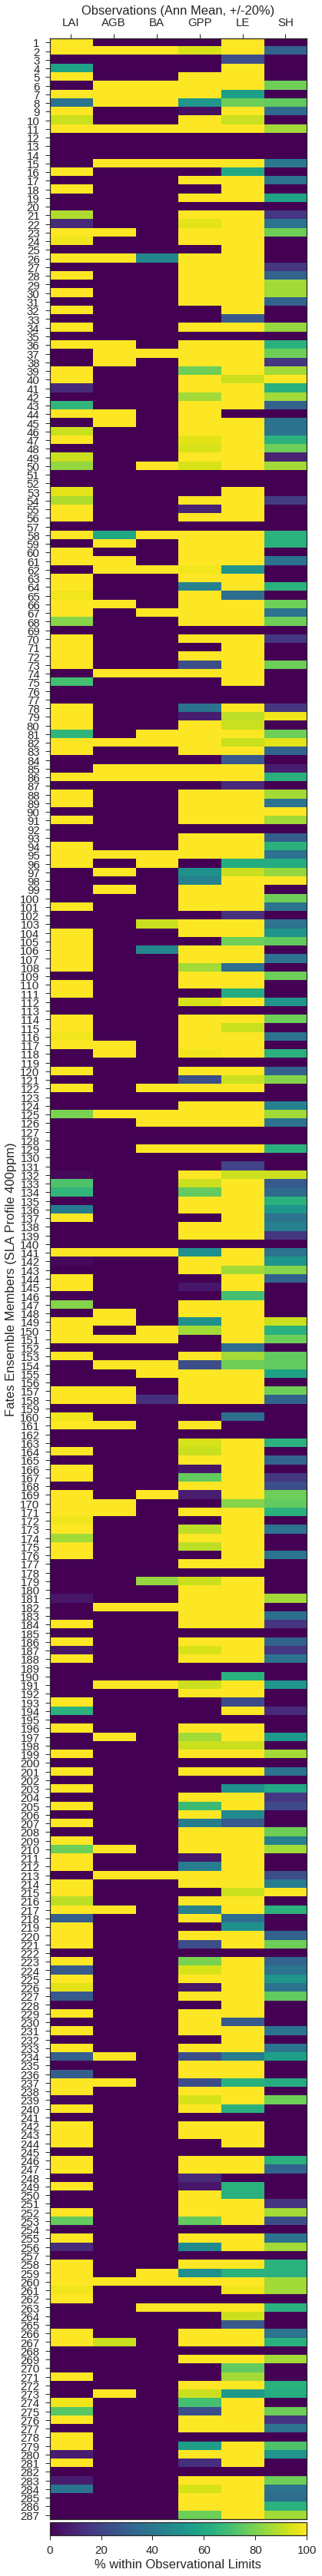

In [28]:
#Heatmap for Pscore (20% degradation of observed range)
# Set level of degradation for this heatmap (0 = none, 1= 10%, 2 = 20%)
dgind = 2
heatdata = (np.stack((
    pscore_lai[:,dgind],
    pscore_agb[:,dgind],
    pscore_ba[:,dgind],
    pscore_gpp[:,dgind],
    pscore_le[:,dgind],
    pscore_h[:,dgind]),
    axis=1))

ens = [str(x) for x in range(1,288)]
obs = ["LAI",
       "AGB",
       "BA",
       "GPP",
       "LE",
       "SH"]

fig, ax = plt.subplots(figsize=(6,70))
im = ax.imshow(heatdata,cmap="viridis",aspect='auto')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax,orientation="horizontal", pad=0.001)
cbar.ax.set_xlabel('% within Observational Limits')

ax.set_xlabel('Observations (Ann Mean, +/-20%)')
ax.set_xticks(np.arange(len(obs)))
ax.xaxis.tick_top()
ax.set_xticklabels(obs)
ax.xaxis.set_label_position('top')

ax.set_ylabel(heatmap_ylabel)
ax.set_yticks(np.arange(len(ens)))
ax.set_yticklabels(ens)
set

In [29]:
# save image
fig.savefig(save_plot_as_dg20, bbox_inches='tight')

# Skill Score Measure #2:  Distance Score
Measures how far from the observed mean each ensemble member's annual means are, considering the range in observations

In [30]:
# Calculate Distance metric using Normalized Root Mean Square Error (RMSE/Observed Range)
# We use this version of the distance score in the analysis below

#Define distance metric
def dist_calc_rmse(nens,endyear,startyear,fe_ts,obs_ts):
    dist_score_rmse = np.ma.masked_all([nens,1])
    obs_min = min(obs_ts)
    obs_max = max(obs_ts)
    for i in range(nens):
        nyears = endyear-startyear+1
        dist_score_rmse[i,:] = np.sqrt(np.nansum((np.nanmean(obs_ts) - fe_ts[i,:])**2) / nyears)/(obs_max-obs_min)
    return dist_score_rmse

# Calculate Distance score for each variable
# LAI
dscore_lai_jan = dist_calc_rmse(nens,endyear,startyear,fe_lai_annmeants,lai_annmean_janstart)
dscore_lai_aug = dist_calc_rmse(nens,endyear,startyear,fe_lai_annmeants,lai_annmean_augstart)
# AGB   
dscore_agb = dist_calc_rmse(nens,endyear,startyear,fe_agb_annts,agb_cbiomass_obs)
# BA
dscore_ba = dist_calc_rmse(nens,endyear,startyear,fe_ba_annts,basalarea_obs)
#GPP    
dscore_gpp_jul = dist_calc_rmse(nens,endyear,startyear,fe_gpp_annmeants,gpp_annmean_julystart)
dscore_gpp_aug = dist_calc_rmse(nens,endyear,startyear,fe_gpp_annmeants,gpp_annmean_augstart)
#LH  
dscore_le_jul = dist_calc_rmse(nens,endyear,startyear,fe_le_annmeants,le_annmean_julystart)
dscore_le_aug = dist_calc_rmse(nens,endyear,startyear,fe_le_annmeants,le_annmean_augstart)
#SH
dscore_h_jul = dist_calc_rmse(nens,endyear,startyear,fe_h_annmeants,h_annmean_julystart)
dscore_h_aug = dist_calc_rmse(nens,endyear,startyear,fe_h_annmeants,h_annmean_augstart)

In [31]:
# Can also try an alternative method for distance score: the Normalized Mean Absolute Error
def dist_calc(nens,endyear,startyear,fe_ts,obs_ts):
    dist_score = np.ma.masked_all([nens,1])
    obs_min = min(obs_ts)
    obs_max = max(obs_ts)
    for i in range(nens):
        nyears = endyear-startyear+1
        dist_score[i,:] = np.nansum(abs(fe_ts[i,:]-np.nanmean(obs_ts))) /   (nyears*(obs_max-obs_min))
    return dist_score

# Calculate Distance score for each variable
# LAI
dscore2_lai_jan = dist_calc(nens,endyear,startyear,fe_lai_annmeants,lai_annmean_janstart)
dscore2_lai_aug = dist_calc(nens,endyear,startyear,fe_lai_annmeants,lai_annmean_augstart)
# AGB   
dscore2_agb = dist_calc(nens,endyear,startyear,fe_agb_annts,agb_cbiomass_obs)
# BA
dscore2_ba = dist_calc(nens,endyear,startyear,fe_ba_annts,basalarea_obs)
#GPP    
dscore2_gpp_jul = dist_calc(nens,endyear,startyear,fe_gpp_annmeants,gpp_annmean_julystart)
dscore2_gpp_aug = dist_calc(nens,endyear,startyear,fe_gpp_annmeants,gpp_annmean_augstart)
#LH  
dscore2_le_jul = dist_calc(nens,endyear,startyear,fe_le_annmeants,le_annmean_julystart)
dscore2_le_aug = dist_calc(nens,endyear,startyear,fe_le_annmeants,le_annmean_augstart)
#SH
dscore2_h_jul = dist_calc(nens,endyear,startyear,fe_h_annmeants,h_annmean_julystart)
dscore2_h_aug = dist_calc(nens,endyear,startyear,fe_h_annmeants,h_annmean_augstart)

set

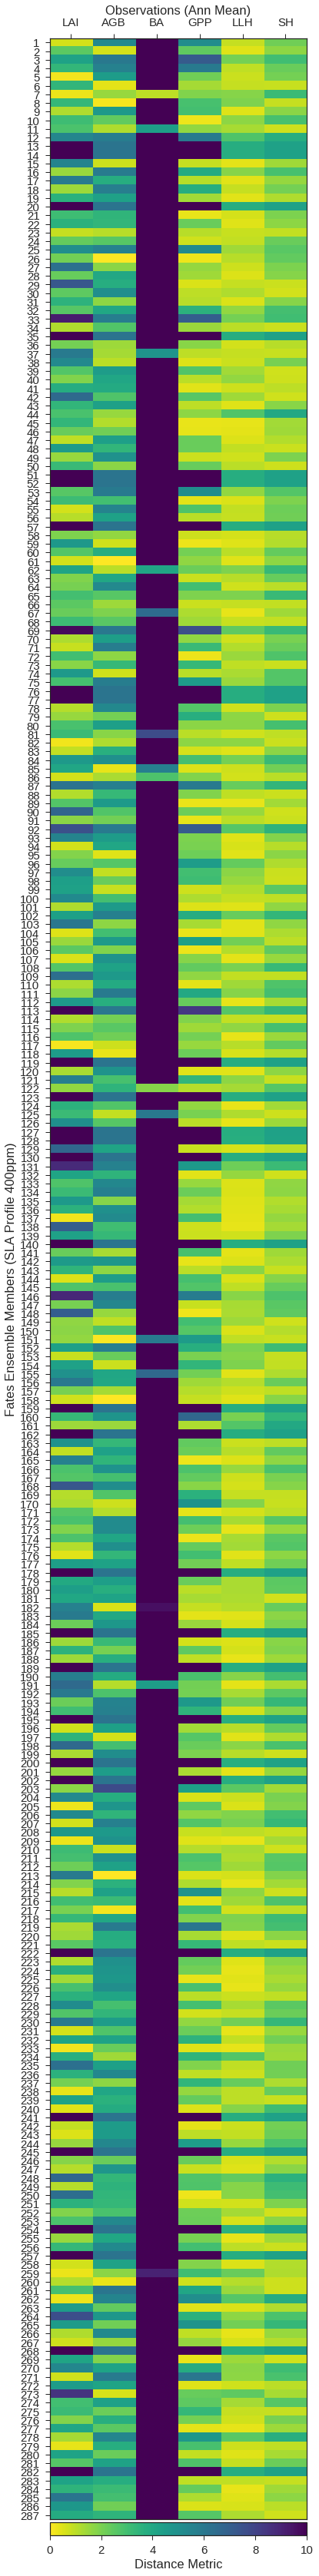

In [32]:
#Heatmap for Distance scores

# Calculate best dscore for each ensemble member x variable
dscore_lai_best = np.fmin(abs(dscore_lai_jan[:,0]),abs(dscore_lai_aug[:,0]))
dscore_gpp_best =np.fmin(abs(dscore_gpp_jul[:,0]),abs(dscore_gpp_aug[:,0]))
dscore_le_best = np.fmin(abs(dscore_le_jul[:,0]),abs(dscore_le_aug[:,0]))
dscore_h_best = np.fmin(abs(dscore_h_jul[:,0]),abs(dscore_h_aug[:,0]))

heatdata = (np.stack((
            dscore_lai_best,
            np.squeeze(dscore_agb[:,0]),
            np.squeeze(dscore_ba[:,0]),
            dscore_gpp_best,
            dscore_le_best,
            dscore_h_best),
    axis=1))

ens = [str(x) for x in range(1,288)]
obs = ["LAI",
       "AGB",
       "BA",
       "GPP",
       "LLH",
       "SH",]

fig, ax = plt.subplots(figsize=(6,70))
im = ax.imshow(heatdata,vmin = 0, vmax = 10,cmap="viridis_r",aspect='auto')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax,orientation="horizontal", pad=0.001)
cbar.ax.set_xlabel('Distance Metric')

ax.set_xlabel('Observations (Ann Mean)')
ax.set_xticks(np.arange(len(obs)))
ax.xaxis.tick_top()
ax.set_xticklabels(obs)
ax.xaxis.set_label_position('top')

ax.set_ylabel(heatmap_ylabel)
ax.set_yticks(np.arange(len(ens)))
ax.set_yticklabels(ens)
set


# Are Skill Scores Correlated Across Variables?
We would like to know if skill scores for individual variables are correlated with one another. This will inform decisions about combining skill scores for individual variables into a weighted average skill score across variables.

In [33]:
# Check if pscores are correlated across variables
dg10ind =1
pscore_matrix = np.transpose(np.stack([pscore_lai[:,dg10ind],pscore_agb[:,dg10ind],pscore_ba[:,dg10ind],pscore_gpp[:,dg10ind],pscore_le[:,dg10ind],pscore_h[:,dg10ind]],axis=0))
pscore_names = ['pscore_lai','pscore_agb','pscore_ba','pscore_gpp','pscore_le','pscore_h']
df = pd.DataFrame(pscore_matrix, columns = pscore_names)

# Generate Table of pearson's correlation coefficients and p-values
# df.corr() # generates matrix of correlation coefficients
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

# Calculate pvalues using the above function
calculate_pvalues(df)
# Indicate significance of pearson's r (*p<=0.05, **p<=0.001)
rho = df.corr()
pval = calculate_pvalues(df) # toto_tico's answer
# create three masks
r1 = rho.applymap(lambda x: '{:.2f}*'.format(x))
r2 = rho.applymap(lambda x: '{:.2f}**'.format(x))
r3 = rho.applymap(lambda x: '{:.2f}***'.format(x))
# apply them where appropriate --this could be a single liner
#rho = rho.mask(pval<=0.1,r1)
rho = rho.mask(pval<=0.05,r1)
rho = rho.mask(pval<=0.001,r2)
rho

pscore_lai pscore_agb   pscore_ba pscore_gpp  pscore_le   pscore_h
pscore_lai      1.00** -0.0225236 -0.00374404  0.0477861     0.19**  0.0493135
pscore_agb  -0.0225236     1.00**       0.17*  0.0937402  0.0904802      0.17*
pscore_ba  -0.00374404      0.17*      1.00**  0.0808148  0.0588866      0.14*
pscore_gpp   0.0477861  0.0937402   0.0808148     1.00**     0.46**      0.17*
pscore_le       0.19**  0.0904802   0.0588866     0.46**     1.00**     0.37**
pscore_h     0.0493135      0.17*       0.14*      0.17*     0.37**     1.00**

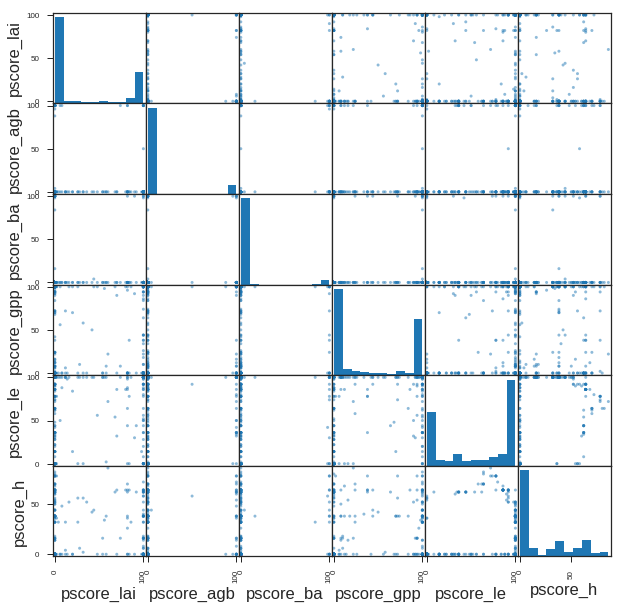

In [34]:
# View as scatter matrix
#pd.scatter_matrix(df, figsize=[10,10])
pd.plotting.scatter_matrix(df, figsize=[10,10])
plt.show()

In [35]:
# Check if dscores are correlated across variables
dscore_matrix = np.transpose(np.stack([dscore_lai_best,np.squeeze(dscore_agb),np.squeeze(dscore_ba),dscore_gpp_best,dscore_le_best,dscore_h_best],axis=0))
dscore_names = ['dscore_lai','dscore_agb','dscore_ba','dscore_gpp','dscore_le','dscore_h']
df = pd.DataFrame(dscore_matrix, columns = dscore_names)

# Generate Table of pearson's correlation coefficients and p-values
# df.corr() # generates matrix of correlation coefficients
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

# Calculate pvalues using the above function
calculate_pvalues(df)
# Indicate significance of pearson's r (*p<=0.05, **p<=0.001)
rho = df.corr()
pval = calculate_pvalues(df) # toto_tico's answer
# create three masks
r1 = rho.applymap(lambda x: '{:.2f}*'.format(x))
r2 = rho.applymap(lambda x: '{:.2f}**'.format(x))
r3 = rho.applymap(lambda x: '{:.2f}***'.format(x))
# apply them where appropriate --this could be a single liner
#rho = rho.mask(pval<=0.1,r1)
rho = rho.mask(pval<=0.05,r1)
rho = rho.mask(pval<=0.001,r2)
rho

dscore_lai dscore_agb dscore_ba dscore_gpp dscore_le dscore_h
dscore_lai     1.00**     0.41**    0.47**     0.79**    0.76**   0.64**
dscore_agb     0.41**     1.00**    0.86**     0.59**    0.46**   0.55**
dscore_ba      0.47**     0.86**    1.00**     0.64**    0.54**   0.61**
dscore_gpp     0.79**     0.59**    0.64**     1.00**    0.86**   0.71**
dscore_le      0.76**     0.46**    0.54**     0.86**    1.00**   0.77**
dscore_h       0.64**     0.55**    0.61**     0.71**    0.77**   1.00**

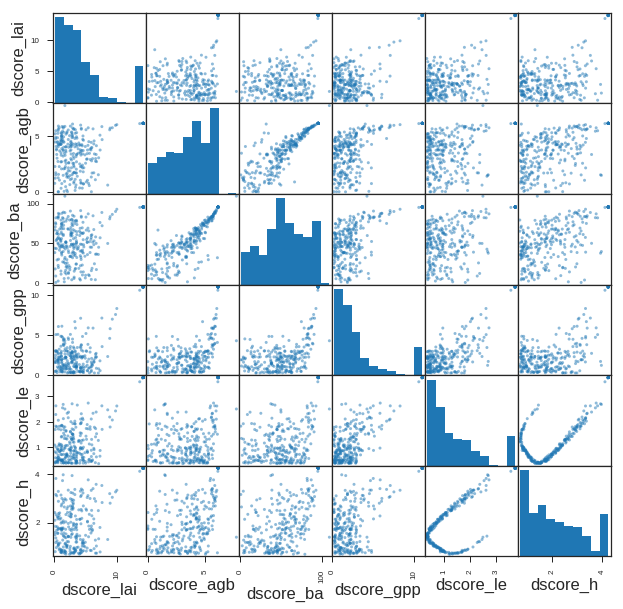

In [36]:
# View as scatter matrix
#pd.scatter_matrix(df, figsize=[10,10])
pd.plotting.scatter_matrix(df, figsize=[10,10])
plt.show()

# Calculate Weighted Average Skill Scores Across Variables

#### Pscores

In [37]:
#Define Weighted Average Functions for averaging scores across variables

# Define weighted average favoring LAI, AGB, and BA (our structural properties)
def wavg_strct(lai_score,agb_score,ba_score,gpp_score,le_score,h_score):
    w = 0.3
    score_wavg_strct = ( w*(lai_score) 
             + w*(agb_score) 
             + w*(ba_score)
             + (1-3*w)*((gpp_score)+ (le_score) + (h_score))/3)
    return score_wavg_strct


# Alternative weightings:
# 1. Weighted average giving greatest weight to LAI, then to combination of AGB and BA (which are correlated with one another),
# and small weight to fluxes which are correlated with one another and with LAI.
def wavg_corr(lai_score,agb_score,ba_score,gpp_score,le_score,h_score):
    w1 = 0.4
    w2 = 0.25
    w3 = 0.1
    score_wavg_corr = ( w1*(lai_score) 
             + w2*(agb_score) 
             + w2*(ba_score)
             + w3*((gpp_score)+ (le_score) + (h_score))/3)
    return score_wavg_corr


# 2. Weighted average with even weighting across all variables
def wavg_even(lai_score,agb_score,ba_score,gpp_score,le_score,h_score):
    w = 1/6
    score_wavg_even = w*(lai_score) + w*(agb_score) + w*(ba_score) + w*(gpp_score)+ w*(le_score) + w*(h_score)
    return score_wavg_even
    
# 3. Weighted average favoring LAI, AGB, and BA but less heavily (average fluxes as one variable)
def wavg_avgflx(lai_score,agb_score,ba_score,gpp_score,le_score,h_score):
    w = 1/4
    score_wavg_avgflx = w*(lai_score) + w*(agb_score) + w*(ba_score) + w*((gpp_score+le_score+h_score)/3)
    return score_wavg_avgflx


# Weighted Average Pscore for each Ensemble member (Favoring LAI, AGB, and BA)
# With 10% Degradation
dg10ind = 1 # (1 = 10% degradation, 0 = no degradation of observed range)
pscore_wavg_strct_dg10 = wavg_strct(pscore_lai[:,dg10ind],pscore_agb[:,dg10ind],pscore_ba[:,dg10ind],pscore_gpp[:,dg10ind],pscore_le[:,dg10ind],pscore_h[:,dg10ind])

# With 20% Degradation
dg20ind = 2 # (2 =20% degradation, 1 = 10% degradation, 0 = no degradation of observed range)
pscore_wavg_strct_dg20 = wavg_strct(pscore_lai[:,dg20ind],pscore_agb[:,dg20ind],pscore_ba[:,dg20ind],pscore_gpp[:,dg20ind],pscore_le[:,dg20ind],pscore_h[:,dg20ind])


# Alternatively, weighted Average Pscore for each Ensemble member (Favoring LAI and AGB+BA)
# With 10% Degradation
dg10ind = 1 # (1 = 10% degradation, 0 = no degradation of observed range)
pscore_wavg_corr_dg10 = wavg_corr(pscore_lai[:,dg10ind],pscore_agb[:,dg10ind],pscore_ba[:,dg10ind],pscore_gpp[:,dg10ind],pscore_le[:,dg10ind],pscore_h[:,dg10ind])

# With 20% Degradation
dg20ind = 2 # (2 =20% degradation, 1 = 10% degradation, 0 = no degradation of observed range)
pscore_wavg_corr_dg20 = wavg_corr(pscore_lai[:,dg20ind],pscore_agb[:,dg20ind],pscore_ba[:,dg20ind],pscore_gpp[:,dg20ind],pscore_le[:,dg20ind],pscore_h[:,dg20ind])

# Alternatively, weighted Average Pscore for each Ensemble member (Evenly weighted)
# With 10% Degradation
dg10ind = 1 # (1 = 10% degradation, 0 = no degradation of observed range)
pscore_wavg_even_dg10 = wavg_even(pscore_lai[:,dg10ind],pscore_agb[:,dg10ind],pscore_ba[:,dg10ind],pscore_gpp[:,dg10ind],pscore_le[:,dg10ind],pscore_h[:,dg10ind])
# With 20% Degradation
dg20ind = 2 # (2 =20% degradation, 1 = 10% degradation, 0 = no degradation of observed range)
pscore_wavg_even_dg20 = wavg_even(pscore_lai[:,dg20ind],pscore_agb[:,dg20ind],pscore_ba[:,dg20ind],pscore_gpp[:,dg20ind],pscore_le[:,dg20ind],pscore_h[:,dg20ind])


#### Dscores

In [38]:
# Calculate weighted average Distance scores
# Here we use the weighted Euclidean Distance to calculate the distance of model output from the mean observations in multivariate space:
#  Square each variable score before weighting, then take squareroot of the weighted sum;
#  Use the time period that fits model output best (e.g. jan vs aug start)

# Define weighted average favoring LAI, AGB, and BA (our structural properties)
def wavg_strct_sqr_min(lai_score1,lai_score2,agb_score,ba_score,gpp_score1,gpp_score2,le_score1,le_score2,h_score1,h_score2):
    w = 0.3
    score_wavg_strct_sqr_min = np.sqrt(w * (np.fmin(abs(lai_score1[:,0]),abs(lai_score2[:,0])))**2 
                                     + w * (abs(agb_score[:,0]))**2 
                                     + w * (abs(ba_score[:,0]))**2 
                                     + (1-3* w) * ((np.fmin(abs(gpp_score1[:,0]),abs(gpp_score2[:,0])))**2 
                                                  +(np.fmin(abs(le_score1[:,0]),abs(le_score2[:,0])))**2 
                                                  +(np.fmin(abs(h_score1[:,0]),abs(h_score2[:,0])))**2)/3)
    return score_wavg_strct_sqr_min

# Alternative weightings:
# 1. Weighted average giving greatest weight to LAI, then to combination of AGB and BA (which are correlated with one another),
# and small weight to fluxes which are correlated with one another and with LAI.
def wavg_corr_sqr_min(lai_score1,lai_score2,agb_score,ba_score,gpp_score1,gpp_score2,le_score1,le_score2,h_score1,h_score2):
    w1 = 0.4
    w2 = 0.25
    w3 = 0.1
    score_wavg_strct_sqr_min = np.sqrt(w1 * (np.fmin(abs(lai_score1[:,0]),abs(lai_score2[:,0])))**2 
                                     + w2 * (abs(agb_score[:,0]))**2 
                                     + w2 * (abs(ba_score[:,0]))**2 
                                     + w3 * ((np.fmin(abs(gpp_score1[:,0]),abs(gpp_score2[:,0])))**2 
                                                  +(np.fmin(abs(le_score1[:,0]),abs(le_score2[:,0])))**2 
                                                  +(np.fmin(abs(h_score1[:,0]),abs(h_score2[:,0])))**2)/3)
    return score_wavg_strct_sqr_min

# 2. Weighted average with even weighting across all variables
def wavg_even_sqr_min(lai_score1,lai_score2,agb_score,ba_score,gpp_score1,gpp_score2,le_score1,le_score2,h_score1,h_score2):
    w = 1/6
    score_wavg_even_sqr_min = np.sqrt(w * (np.fmin(abs(lai_score1[:,0]),abs(lai_score2[:,0])))**2 
                                     + w * (abs(agb_score[:,0]))**2 
                                     + w * (abs(ba_score[:,0]))**2 
                                     + w * (np.fmin(abs(gpp_score1[:,0]),abs(gpp_score2[:,0])))**2 
                                     + w * (np.fmin(abs(le_score1[:,0]),abs(le_score2[:,0])))**2 
                                     + w * (np.fmin(abs(h_score1[:,0]),abs(h_score2[:,0])))**2)
    return score_wavg_even_sqr_min

# Weighted Average Distance Score (used in analysis below)
dscore_wavg_strct_sqr_min = wavg_strct_sqr_min(dscore_lai_jan,dscore_lai_aug,dscore_agb,dscore_ba,dscore_gpp_jul,dscore_gpp_aug,dscore_le_jul,dscore_le_aug,dscore_h_jul,dscore_h_aug)

# Alternatively, weighted Average Dscore for each Ensemble member (Favoring LAI and AGB+BA)
dscore_wavg_corr_sqr_min = wavg_corr_sqr_min(dscore_lai_jan,dscore_lai_aug,dscore_agb,dscore_ba,dscore_gpp_jul,dscore_gpp_aug,dscore_le_jul,dscore_le_aug,dscore_h_jul,dscore_h_aug)

# Alternatively, weighted Average Dscore for each Ensemble member (Even weighting)
dscore_wavg_even_sqr_min = wavg_even_sqr_min(dscore_lai_jan,dscore_lai_aug,dscore_agb,dscore_ba,dscore_gpp_jul,dscore_gpp_aug,dscore_le_jul,dscore_le_aug,dscore_h_jul,dscore_h_aug)

# Rank ensemble members by their skill scores.
We try this in a number of ways, each relying on different average score weightings. Then, we select the ensemble members that rank in the top 10 regardless of score weighting, level of pscore range degradation, and CO2 concentration.

# 1. Rank ensemble members using Pscore (10% Degradation) and Dscore, with weighting favoring structural properties LAI, AGB, and BA.

In [39]:
# Calculate Ranking for each Pscore and Dscore

# Note: rankdata assigns a rank of 1 to the lowest number
# For dscores, a low number (e.g. 0) is a good score and deserves a low ranking.
# For pscores, a high number (e.g. 100) is a good score so
# we have to calculate 100-pscore before taking the rank so that a pscore of 100 recieves a rank of 1

# Specify which version of the weighted average scores to use in the ranking
pscore_avg = pscore_wavg_strct_dg10
dscore_avg = dscore_wavg_strct_sqr_min

rank_pscore = scipy.stats.rankdata((100-pscore_avg),method='min')
rank_dscore = scipy.stats.rankdata(dscore_avg,method='min')

# Take the sum of the ranks for each ensemble member
#    with low scores given to the best performers
sum_ranks = np.nansum(np.stack([rank_pscore,rank_dscore]),axis=0)
# Sort the index # for each ensemble member by sum_rank (best to worst scores)
FEindx_SortBest2Worst = np.argsort(sum_ranks)

print("Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)")
# Print Index # for Top 10 Ensemble Members
np.transpose(FEindx_SortBest2Worst)[:10,]

Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)


array([150,  85,  84, 124,   6, 121, 259,  61, 181, 258])

In [40]:
# Print individual variable scores for the top 10 performers

for i in range(10):
    memind = FEindx_SortBest2Worst[i]
    dgind = 1
    print("")
    print("")
    print('Ensemble Member Index:',memind)
    print("Pscore Dg 10%")
    print('LAI: ',pscore_lai[memind,dgind])
    print('AGB: ',pscore_agb[memind,dgind])
    print('BA:  ',pscore_ba[memind,dgind])
    print('GPP: ',pscore_gpp[memind,dgind])
    print('LH:  ',pscore_le[memind,dgind])
    print('SH:  ',pscore_h[memind,dgind])

    print("")
    print("Dscores")
    print('LAIj:  ',dscore_lai_jan[memind])
    print('LAIa:  ',dscore_lai_aug[memind])
    print('AGB :  ',dscore_agb[memind])
    print('BA  :  ',dscore_ba[memind])
    print('GPPj:  ',dscore_gpp_jul[memind])
    print('GPPa:  ',dscore_gpp_aug[memind])
    print('LHj :  ',dscore_le_jul[memind])
    print('LHa :  ',dscore_le_aug[memind])
    print('SHj :  ',dscore_h_jul[memind])
    print('SHa :  ',dscore_h_aug[memind])   



Ensemble Member Index: 150
Pscore Dg 10%
LAI:  82.0
AGB:  100.0
BA:   100.0
GPP:  0.0
LH:   86.0
SH:   64.0

Dscores
LAIj:   [6.186951631251615]
LAIa:   [1.6127873882166486]
AGB :   [0.05999647889578447]
BA  :   [5.932893436052589]
GPPj:   [4.530204123767495]
GPPa:   [4.769104942804819]
LHj :   [0.9449710105958875]
LHa :   [1.3505719384241914]
SHj :   [0.9288400075541026]
SHa :   [0.8530759611018643]


Ensemble Member Index: 85
Pscore Dg 10%
LAI:  100.0
AGB:  0.0
BA:   100.0
GPP:  44.0
LH:   100.0
SH:   44.0

Dscores
LAIj:   [5.352261504236942]
LAIa:   [0.6669561781637884]
AGB :   [1.2781348259425607]
BA  :   [2.776341869363323]
GPPj:   [1.9054161411404007]
GPPa:   [2.000442394219784]
LHj :   [0.6834061471758957]
LHa :   [0.9869569388063257]
SHj :   [1.1285347020112244]
SHa :   [1.038790001599671]


Ensemble Member Index: 84
Pscore Dg 10%
LAI:  0.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   100.0
SH:   0.0

Dscores
LAIj:   [22.5296894165187]
LAIa:   [4.062608740783732]
AGB :   [0.3660

# 2. Rank ensemble members using Pscore (20% Degradation) and Dscore, with weighting favoring structural properties LAI, AGB, and BA.

In [41]:
# Calculate Ranking for each Pscore and Dscore

# Note: rankdata assigns a rank of 1 to the lowest number
# For dscores, a low number (e.g. 0) is a good score and deserves a low ranking.
# For pscores, a high number (e.g. 100) is a good score so
#     we have to calculate 100-pscore before taking the rank so that a pscore of 100 recieves a rank of 1

# Specify which version of the weighted average scores to use in the ranking
pscore_avg = pscore_wavg_strct_dg20
dscore_avg = dscore_wavg_strct_sqr_min
# kscore_avg = 
# tscore_avg = 

rank_pscore_d20 = scipy.stats.rankdata((100-pscore_avg),method='min')
rank_dscore = scipy.stats.rankdata(dscore_avg,method='min')

# Take the sum of the ranks for each ensemble member
#    with low scores = best performers
sum_ranks_d20 = np.nansum(np.stack([rank_pscore_d20,rank_dscore]),axis=0)
# Sort the index # for each ensemble member by sum_rank (best to worst scores)
FEindx_SortBest2Worst_d20 = np.argsort(sum_ranks_d20)

print("Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)")
# Print Index # for Top 10 Ensemble Members
np.transpose(FEindx_SortBest2Worst_d20)[:10,]

Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)


array([ 85,  10,   6, 150, 124, 259,  36, 140,  57,  81])

In [42]:
# Print individual variable scores for the top 10 performers

for i in range(10):
    memind = FEindx_SortBest2Worst_d20[i]
    dgind = 2 # specific 20% degradation for pscore
    print("")
    print("")
    print('Ensemble Member Index:',memind)
    print("Pscore Dg 20%")
    print('LAI: ',pscore_lai[memind,dgind])
    print('AGB: ',pscore_agb[memind,dgind])
    print('BA:  ',pscore_ba[memind,dgind])
    print('GPP: ',pscore_gpp[memind,dgind])
    print('LH:  ',pscore_le[memind,dgind])
    print('SH:  ',pscore_h[memind,dgind])

    print("")
    print("Dscores")
    print('LAIj:  ',dscore_lai_jan[memind])
    print('LAIa:  ',dscore_lai_aug[memind])
    print('AGB :  ',dscore_agb[memind])
    print('BA  :  ',dscore_ba[memind])
    print('GPPj:  ',dscore_gpp_jul[memind])
    print('GPPa:  ',dscore_gpp_aug[memind])
    print('LHj :  ',dscore_le_jul[memind])
    print('LHa :  ',dscore_le_aug[memind])
    print('SHj :  ',dscore_h_jul[memind])
    print('SHa :  ',dscore_h_aug[memind])   



Ensemble Member Index: 85
Pscore Dg 20%
LAI:  100.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   100.0
SH:   64.0

Dscores
LAIj:   [5.352261504236942]
LAIa:   [0.6669561781637884]
AGB :   [1.2781348259425607]
BA  :   [2.776341869363323]
GPPj:   [1.9054161411404007]
GPPa:   [2.000442394219784]
LHj :   [0.6834061471758957]
LHa :   [0.9869569388063257]
SHj :   [1.1285347020112244]
SHa :   [1.038790001599671]


Ensemble Member Index: 10
Pscore Dg 20%
LAI:  100.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   100.0
SH:   86.0

Dscores
LAIj:   [16.2215092778751]
LAIa:   [2.8139748200141605]
AGB :   [1.197386605015775]
BA  :   [4.359362825866105]
GPPj:   [1.6050698368358545]
GPPa:   [1.6837106145772185]
LHj :   [1.3161783656539312]
LHa :   [1.8617210180591095]
SHj :   [0.8257838771785303]
SHa :   [0.7453287073740196]


Ensemble Member Index: 6
Pscore Dg 20%
LAI:  100.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   56.0
SH:   0.0

Dscores
LAIj:   [3.0378825550001025]
LAIa:   [0.2951283115337102]
AGB :  

# 3. Rank ensemble members using Pscore (10% Degradation) and Dscore, giving greatest weight to LAI, then to combination of AGB and BA

In [43]:
# Calculate Ranking for each Pscore and Dscore

# Note: rankdata assigns a rank of 1 to the lowest number
# For dscores, a low number (e.g. 0) is a good score and deserves a low ranking.
# For pscores, a high number (e.g. 100) is a good score so
#     we have to calculate 100-pscore before taking the rank so that a pscore of 100 recieves a rank of 1

# Specify which version of the weighted average scores to use in the ranking
pscore_avg = pscore_wavg_corr_dg10
dscore_avg = dscore_wavg_corr_sqr_min

rank_pscore_d10_corr = scipy.stats.rankdata((100-pscore_avg),method='min')
rank_dscore_corr = scipy.stats.rankdata(dscore_avg,method='min')

# Take the sum of the ranks for each ensemble member
#    with low scores = best performers
sum_ranks_d10_corr = np.nansum(np.stack([rank_pscore_d10_corr,rank_dscore_corr]),axis=0)
# Sort the index # for each ensemble member by sum_rank (best to worst scores)
FEindx_SortBest2Worst_d10_corr = np.argsort(sum_ranks_d10_corr)

print("Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)")
# Print Index # for Top 10 Ensemble Members
np.transpose(FEindx_SortBest2Worst_d10_corr)[:10,]

Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)


array([ 85, 150,   6, 121, 259, 258, 124,  84,  61, 181])

In [44]:
# Print individual variable scores for the top 10 performers

for i in range(10):
    memind = FEindx_SortBest2Worst_d10_corr[i]
    dgind = 1 # specify 10% degradation for pscore
    print("")
    print("")
    print('Ensemble Member Index:',memind)
    print("Pscore Dg 10%")
    print('LAI: ',pscore_lai[memind,dgind])
    print('AGB: ',pscore_agb[memind,dgind])
    print('BA:  ',pscore_ba[memind,dgind])
    print('GPP: ',pscore_gpp[memind,dgind])
    print('LH:  ',pscore_le[memind,dgind])
    print('SH:  ',pscore_h[memind,dgind])

    print("")
    print("Dscores")
    print('LAIj:  ',dscore_lai_jan[memind])
    print('LAIa:  ',dscore_lai_aug[memind])
    print('AGB :  ',dscore_agb[memind])
    print('BA  :  ',dscore_ba[memind])
    print('GPPj:  ',dscore_gpp_jul[memind])
    print('GPPa:  ',dscore_gpp_aug[memind])
    print('LHj :  ',dscore_le_jul[memind])
    print('LHa :  ',dscore_le_aug[memind])
    print('SHj :  ',dscore_h_jul[memind])
    print('SHa :  ',dscore_h_aug[memind])   



Ensemble Member Index: 85
Pscore Dg 10%
LAI:  100.0
AGB:  0.0
BA:   100.0
GPP:  44.0
LH:   100.0
SH:   44.0

Dscores
LAIj:   [5.352261504236942]
LAIa:   [0.6669561781637884]
AGB :   [1.2781348259425607]
BA  :   [2.776341869363323]
GPPj:   [1.9054161411404007]
GPPa:   [2.000442394219784]
LHj :   [0.6834061471758957]
LHa :   [0.9869569388063257]
SHj :   [1.1285347020112244]
SHa :   [1.038790001599671]


Ensemble Member Index: 150
Pscore Dg 10%
LAI:  82.0
AGB:  100.0
BA:   100.0
GPP:  0.0
LH:   86.0
SH:   64.0

Dscores
LAIj:   [6.186951631251615]
LAIa:   [1.6127873882166486]
AGB :   [0.05999647889578447]
BA  :   [5.932893436052589]
GPPj:   [4.530204123767495]
GPPa:   [4.769104942804819]
LHj :   [0.9449710105958875]
LHa :   [1.3505719384241914]
SHj :   [0.9288400075541026]
SHa :   [0.8530759611018643]


Ensemble Member Index: 6
Pscore Dg 10%
LAI:  100.0
AGB:  0.0
BA:   100.0
GPP:  0.0
LH:   0.0
SH:   0.0

Dscores
LAIj:   [3.0378825550001025]
LAIa:   [0.2951283115337102]
AGB :   [1.536285

# 4. Rank ensemble members using Pscore (20% Degradation) and Dscore, giving greatest weight to LAI, then to combination of AGB and BA

In [45]:
# Calculate Ranking for each Pscore and Dscore

# Note: rankdata assigns a rank of 1 to the lowest number
# For dscores, a low number (e.g. 0) is a good score and deserves a low ranking.
# For pscores, a high number (e.g. 100) is a good score so
#     we have to calculate 100-pscore before taking the rank so that a pscore of 100 recieves a rank of 1

# Specify which version of the weighted average scores to use in the ranking
pscore_avg = pscore_wavg_corr_dg20
dscore_avg = dscore_wavg_corr_sqr_min

rank_pscore_d20_corr = scipy.stats.rankdata((100-pscore_avg),method='min')
rank_dscore_corr = scipy.stats.rankdata(dscore_avg,method='min')

# Take the sum of the ranks for each ensemble member
#    with low scores = best performers
sum_ranks_d20_corr = np.nansum(np.stack([rank_pscore_d20_corr,rank_dscore_corr]),axis=0)
# Sort the index # for each ensemble member by sum_rank (best to worst scores)
FEindx_SortBest2Worst_d20_corr = np.argsort(sum_ranks_d20_corr)

print("Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)")
# Print Index # for Top 10 Ensemble Members
np.transpose(FEindx_SortBest2Worst_d20_corr)[:10,]

Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)


array([ 10,  85,   6, 150, 259, 124,  57, 140, 121,  66])

In [46]:
# Print individual variable scores for the top 10 performers

for i in range(10):
    memind = FEindx_SortBest2Worst_d20_corr[i]
    dgind = 2
    print("")
    print("")
    print('Ensemble Member Index:',memind)
    print("Pscore Dg 20%")
    print('LAI: ',pscore_lai[memind,dgind])
    print('AGB: ',pscore_agb[memind,dgind])
    print('BA:  ',pscore_ba[memind,dgind])
    print('GPP: ',pscore_gpp[memind,dgind])
    print('LH:  ',pscore_le[memind,dgind])
    print('SH:  ',pscore_h[memind,dgind])

    print("")
    print("Dscores")
    print('LAIj:  ',dscore_lai_jan[memind])
    print('LAIa:  ',dscore_lai_aug[memind])
    print('AGB :  ',dscore_agb[memind])
    print('BA  :  ',dscore_ba[memind])
    print('GPPj:  ',dscore_gpp_jul[memind])
    print('GPPa:  ',dscore_gpp_aug[memind])
    print('LHj :  ',dscore_le_jul[memind])
    print('LHa :  ',dscore_le_aug[memind])
    print('SHj :  ',dscore_h_jul[memind])
    print('SHa :  ',dscore_h_aug[memind])   



Ensemble Member Index: 10
Pscore Dg 20%
LAI:  100.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   100.0
SH:   86.0

Dscores
LAIj:   [16.2215092778751]
LAIa:   [2.8139748200141605]
AGB :   [1.197386605015775]
BA  :   [4.359362825866105]
GPPj:   [1.6050698368358545]
GPPa:   [1.6837106145772185]
LHj :   [1.3161783656539312]
LHa :   [1.8617210180591095]
SHj :   [0.8257838771785303]
SHa :   [0.7453287073740196]


Ensemble Member Index: 85
Pscore Dg 20%
LAI:  100.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   100.0
SH:   64.0

Dscores
LAIj:   [5.352261504236942]
LAIa:   [0.6669561781637884]
AGB :   [1.2781348259425607]
BA  :   [2.776341869363323]
GPPj:   [1.9054161411404007]
GPPa:   [2.000442394219784]
LHj :   [0.6834061471758957]
LHa :   [0.9869569388063257]
SHj :   [1.1285347020112244]
SHa :   [1.038790001599671]


Ensemble Member Index: 6
Pscore Dg 20%
LAI:  100.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   56.0
SH:   0.0

Dscores
LAIj:   [3.0378825550001025]
LAIa:   [0.2951283115337102]
AGB :  

# 5. Rank ensemble members using Pscore (10% Degradation) and Dscore, evenly weighting all variables

In [47]:
# Calculate Ranking for each Pscore and Dscore

# Note: rankdata assigns a rank of 1 to the lowest number
# For dscores, a low number (e.g. 0) is a good score and deserves a low ranking.
# For pscores, a high number (e.g. 100) is a good score so
#     we have to calculate 100-pscore before taking the rank so that a pscore of 100 recieves a rank of 1

# Specify which version of the weighted average scores to use in the ranking
pscore_avg = pscore_wavg_even_dg10
dscore_avg = dscore_wavg_even_sqr_min

rank_pscore_d10_even = scipy.stats.rankdata((100-pscore_avg),method='min')
rank_dscore_even = scipy.stats.rankdata(dscore_avg,method='min')

# Take the sum of the ranks for each ensemble member
#    with low scores = best performers
sum_ranks_d10_even = np.nansum(np.stack([rank_pscore_d10_even,rank_dscore_even]),axis=0)
# Sort the index # for each ensemble member by sum_rank (best to worst scores)
FEindx_SortBest2Worst_d10_even = np.argsort(sum_ranks_d10_even)

print("Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)")
# Print Index # for Top 10 Ensemble Members
np.transpose(FEindx_SortBest2Worst_d10_even)[:10,]

Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)


array([ 85,  84, 124, 150, 259,  36,  80, 181,  66,  10])

In [48]:
# Print individual variable scores for the top 10 performers

for i in range(10):
    memind = FEindx_SortBest2Worst_d10_even[i]
    dg10ind = 1
    print("")
    print("")
    print('Ensemble Member Index:',memind)
    print("Pscore Dg 10%")
    print('LAI: ',pscore_lai[memind,dgind])
    print('AGB: ',pscore_agb[memind,dgind])
    print('BA:  ',pscore_ba[memind,dgind])
    print('GPP: ',pscore_gpp[memind,dgind])
    print('LH:  ',pscore_le[memind,dgind])
    print('SH:  ',pscore_h[memind,dgind])

    print("")
    print("Dscores")
    print('LAIj:  ',dscore_lai_jan[memind])
    print('LAIa:  ',dscore_lai_aug[memind])
    print('AGB :  ',dscore_agb[memind])
    print('BA  :  ',dscore_ba[memind])
    print('GPPj:  ',dscore_gpp_jul[memind])
    print('GPPa:  ',dscore_gpp_aug[memind])
    print('LHj :  ',dscore_le_jul[memind])
    print('LHa :  ',dscore_le_aug[memind])
    print('SHj :  ',dscore_h_jul[memind])
    print('SHa :  ',dscore_h_aug[memind])   



Ensemble Member Index: 85
Pscore Dg 10%
LAI:  100.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   100.0
SH:   64.0

Dscores
LAIj:   [5.352261504236942]
LAIa:   [0.6669561781637884]
AGB :   [1.2781348259425607]
BA  :   [2.776341869363323]
GPPj:   [1.9054161411404007]
GPPa:   [2.000442394219784]
LHj :   [0.6834061471758957]
LHa :   [0.9869569388063257]
SHj :   [1.1285347020112244]
SHa :   [1.038790001599671]


Ensemble Member Index: 84
Pscore Dg 10%
LAI:  0.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   100.0
SH:   8.0

Dscores
LAIj:   [22.5296894165187]
LAIa:   [4.062608740783732]
AGB :   [0.36609664376758194]
BA  :   [5.685668428135224]
GPPj:   [0.5121087019168272]
GPPa:   [0.5316319135829863]
LHj :   [0.7654374364551656]
LHa :   [0.9908827216806696]
SHj :   [2.3436602735238985]
SHa :   [2.137958520812619]


Ensemble Member Index: 124
Pscore Dg 10%
LAI:  80.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   100.0
SH:   86.0

Dscores
LAIj:   [18.017850425503365]
LAIa:   [3.1711989209194287]
AGB :  

# 6. Rank ensemble members using Pscore (20% Degradation) and Dscore, evenly weighting all variables

In [49]:
# Calculate Ranking for each Pscore and Dscore

# Note: rankdata assigns a rank of 1 to the lowest number
# For dscores, a low number (e.g. 0) is a good score and deserves a low ranking.
# For pscores, a high number (e.g. 100) is a good score so
#     we have to calculate 100-pscore before taking the rank so that a pscore of 100 recieves a rank of 1

# Specify which version of the weighted average scores to use in the ranking
pscore_avg = pscore_wavg_even_dg20
dscore_avg = dscore_wavg_even_sqr_min

rank_pscore_d20_even = scipy.stats.rankdata((100-pscore_avg),method='min')
rank_dscore_even = scipy.stats.rankdata(dscore_avg,method='min')

# Take the sum of the ranks for each ensemble member
#    with low scores = best performers
sum_ranks_d20_even = np.nansum(np.stack([rank_pscore_d20_even,rank_dscore_even]),axis=0)
# Sort the index # for each ensemble member by sum_rank (best to worst scores)
FEindx_SortBest2Worst_d20_even = np.argsort(sum_ranks_d20_even)

print("Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)")
# Print Index # for Top 10 Ensemble Members
np.transpose(FEindx_SortBest2Worst_d20_even)[:10,]

Index # for Top 10 Ensemble Members (add 1 to get enesemble member #)


array([ 85,  10, 124, 259, 150,  36,   6,  57, 140,  81])

In [50]:
# Print individual variable scores for the top 10 performers

for i in range(10):
    memind = FEindx_SortBest2Worst_d20_even[i]
    dgind = 2
    print("")
    print("")
    print('Ensemble Member Index:',memind)
    print("Pscore Dg 20%")
    print('LAI: ',pscore_lai[memind,dgind])
    print('AGB: ',pscore_agb[memind,dgind])
    print('BA:  ',pscore_ba[memind,dgind])
    print('GPP: ',pscore_gpp[memind,dgind])
    print('LH:  ',pscore_le[memind,dgind])
    print('SH:  ',pscore_h[memind,dgind])

    print("")
    print("Dscores")
    print('LAIj:  ',dscore_lai_jan[memind])
    print('LAIa:  ',dscore_lai_aug[memind])
    print('AGB :  ',dscore_agb[memind])
    print('BA  :  ',dscore_ba[memind])
    print('GPPj:  ',dscore_gpp_jul[memind])
    print('GPPa:  ',dscore_gpp_aug[memind])
    print('LHj :  ',dscore_le_jul[memind])
    print('LHa :  ',dscore_le_aug[memind])
    print('SHj :  ',dscore_h_jul[memind])
    print('SHa :  ',dscore_h_aug[memind])   



Ensemble Member Index: 85
Pscore Dg 20%
LAI:  100.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   100.0
SH:   64.0

Dscores
LAIj:   [5.352261504236942]
LAIa:   [0.6669561781637884]
AGB :   [1.2781348259425607]
BA  :   [2.776341869363323]
GPPj:   [1.9054161411404007]
GPPa:   [2.000442394219784]
LHj :   [0.6834061471758957]
LHa :   [0.9869569388063257]
SHj :   [1.1285347020112244]
SHa :   [1.038790001599671]


Ensemble Member Index: 10
Pscore Dg 20%
LAI:  100.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   100.0
SH:   86.0

Dscores
LAIj:   [16.2215092778751]
LAIa:   [2.8139748200141605]
AGB :   [1.197386605015775]
BA  :   [4.359362825866105]
GPPj:   [1.6050698368358545]
GPPa:   [1.6837106145772185]
LHj :   [1.3161783656539312]
LHa :   [1.8617210180591095]
SHj :   [0.8257838771785303]
SHa :   [0.7453287073740196]


Ensemble Member Index: 124
Pscore Dg 20%
LAI:  80.0
AGB:  100.0
BA:   100.0
GPP:  100.0
LH:   100.0
SH:   86.0

Dscores
LAIj:   [18.017850425503365]
LAIa:   [3.1711989209194287]
AGB 

# To see individual scores for specific ensemble member(s), enter the index number(s) below.

In [51]:
# Specifiy ensemble members index numbers here:
selected_fe = [85,259,150,6,94,124,57,84,258]

for i in range(len(selected_fe)):
    memind = selected_fe[i]
    dgind = 1 # Specify level of pscore degradation (0= no degrad., 1 = 10% degradation, 2 = 20% degradation)
    print("")
    print("")
    print('Ensemble Member Index:',memind)
    print("Pscore Dg 10%")
    print('LAI: ',pscore_lai[memind,dgind])
    print('AGB: ',pscore_agb[memind,dgind])
    print('BA:  ',pscore_ba[memind,dgind])
    print('GPP: ',pscore_gpp[memind,dgind])
    print('LH:  ',pscore_le[memind,dgind])
    print('SH:  ',pscore_h[memind,dgind])

    print("")
    print("Dscores")
    print('LAIj:  ',dscore_lai_jan[memind])
    print('LAIa:  ',dscore_lai_aug[memind])
    print('AGB :  ',dscore_agb[memind])
    print('BA  :  ',dscore_ba[memind])
    print('GPPj:  ',dscore_gpp_jul[memind])
    print('GPPa:  ',dscore_gpp_aug[memind])
    print('LHj :  ',dscore_le_jul[memind])
    print('LHa :  ',dscore_le_aug[memind])
    print('SHj :  ',dscore_h_jul[memind])
    print('SHa :  ',dscore_h_aug[memind])   



Ensemble Member Index: 85
Pscore Dg 10%
LAI:  100.0
AGB:  0.0
BA:   100.0
GPP:  44.0
LH:   100.0
SH:   44.0

Dscores
LAIj:   [5.352261504236942]
LAIa:   [0.6669561781637884]
AGB :   [1.2781348259425607]
BA  :   [2.776341869363323]
GPPj:   [1.9054161411404007]
GPPa:   [2.000442394219784]
LHj :   [0.6834061471758957]
LHa :   [0.9869569388063257]
SHj :   [1.1285347020112244]
SHa :   [1.038790001599671]


Ensemble Member Index: 259
Pscore Dg 10%
LAI:  100.0
AGB:  100.0
BA:   0.0
GPP:  100.0
LH:   80.0
SH:   72.0

Dscores
LAIj:   [3.71358148771292]
LAIa:   [1.1248216852738353]
AGB :   [0.33714035714961893]
BA  :   [11.386798657793745]
GPPj:   [0.7360160698687586]
GPPa:   [0.7678214492769168]
LHj :   [1.113380746917154]
LHa :   [1.5828533445678779]
SHj :   [0.8450853256323342]
SHa :   [0.7697393358688464]


Ensemble Member Index: 150
Pscore Dg 10%
LAI:  82.0
AGB:  100.0
BA:   100.0
GPP:  0.0
LH:   86.0
SH:   64.0

Dscores
LAIj:   [6.186951631251615]
LAIa:   [1.6127873882166486]
AGB :   [0.

# Plot Skill Scores onto Trait Covariance Matrix


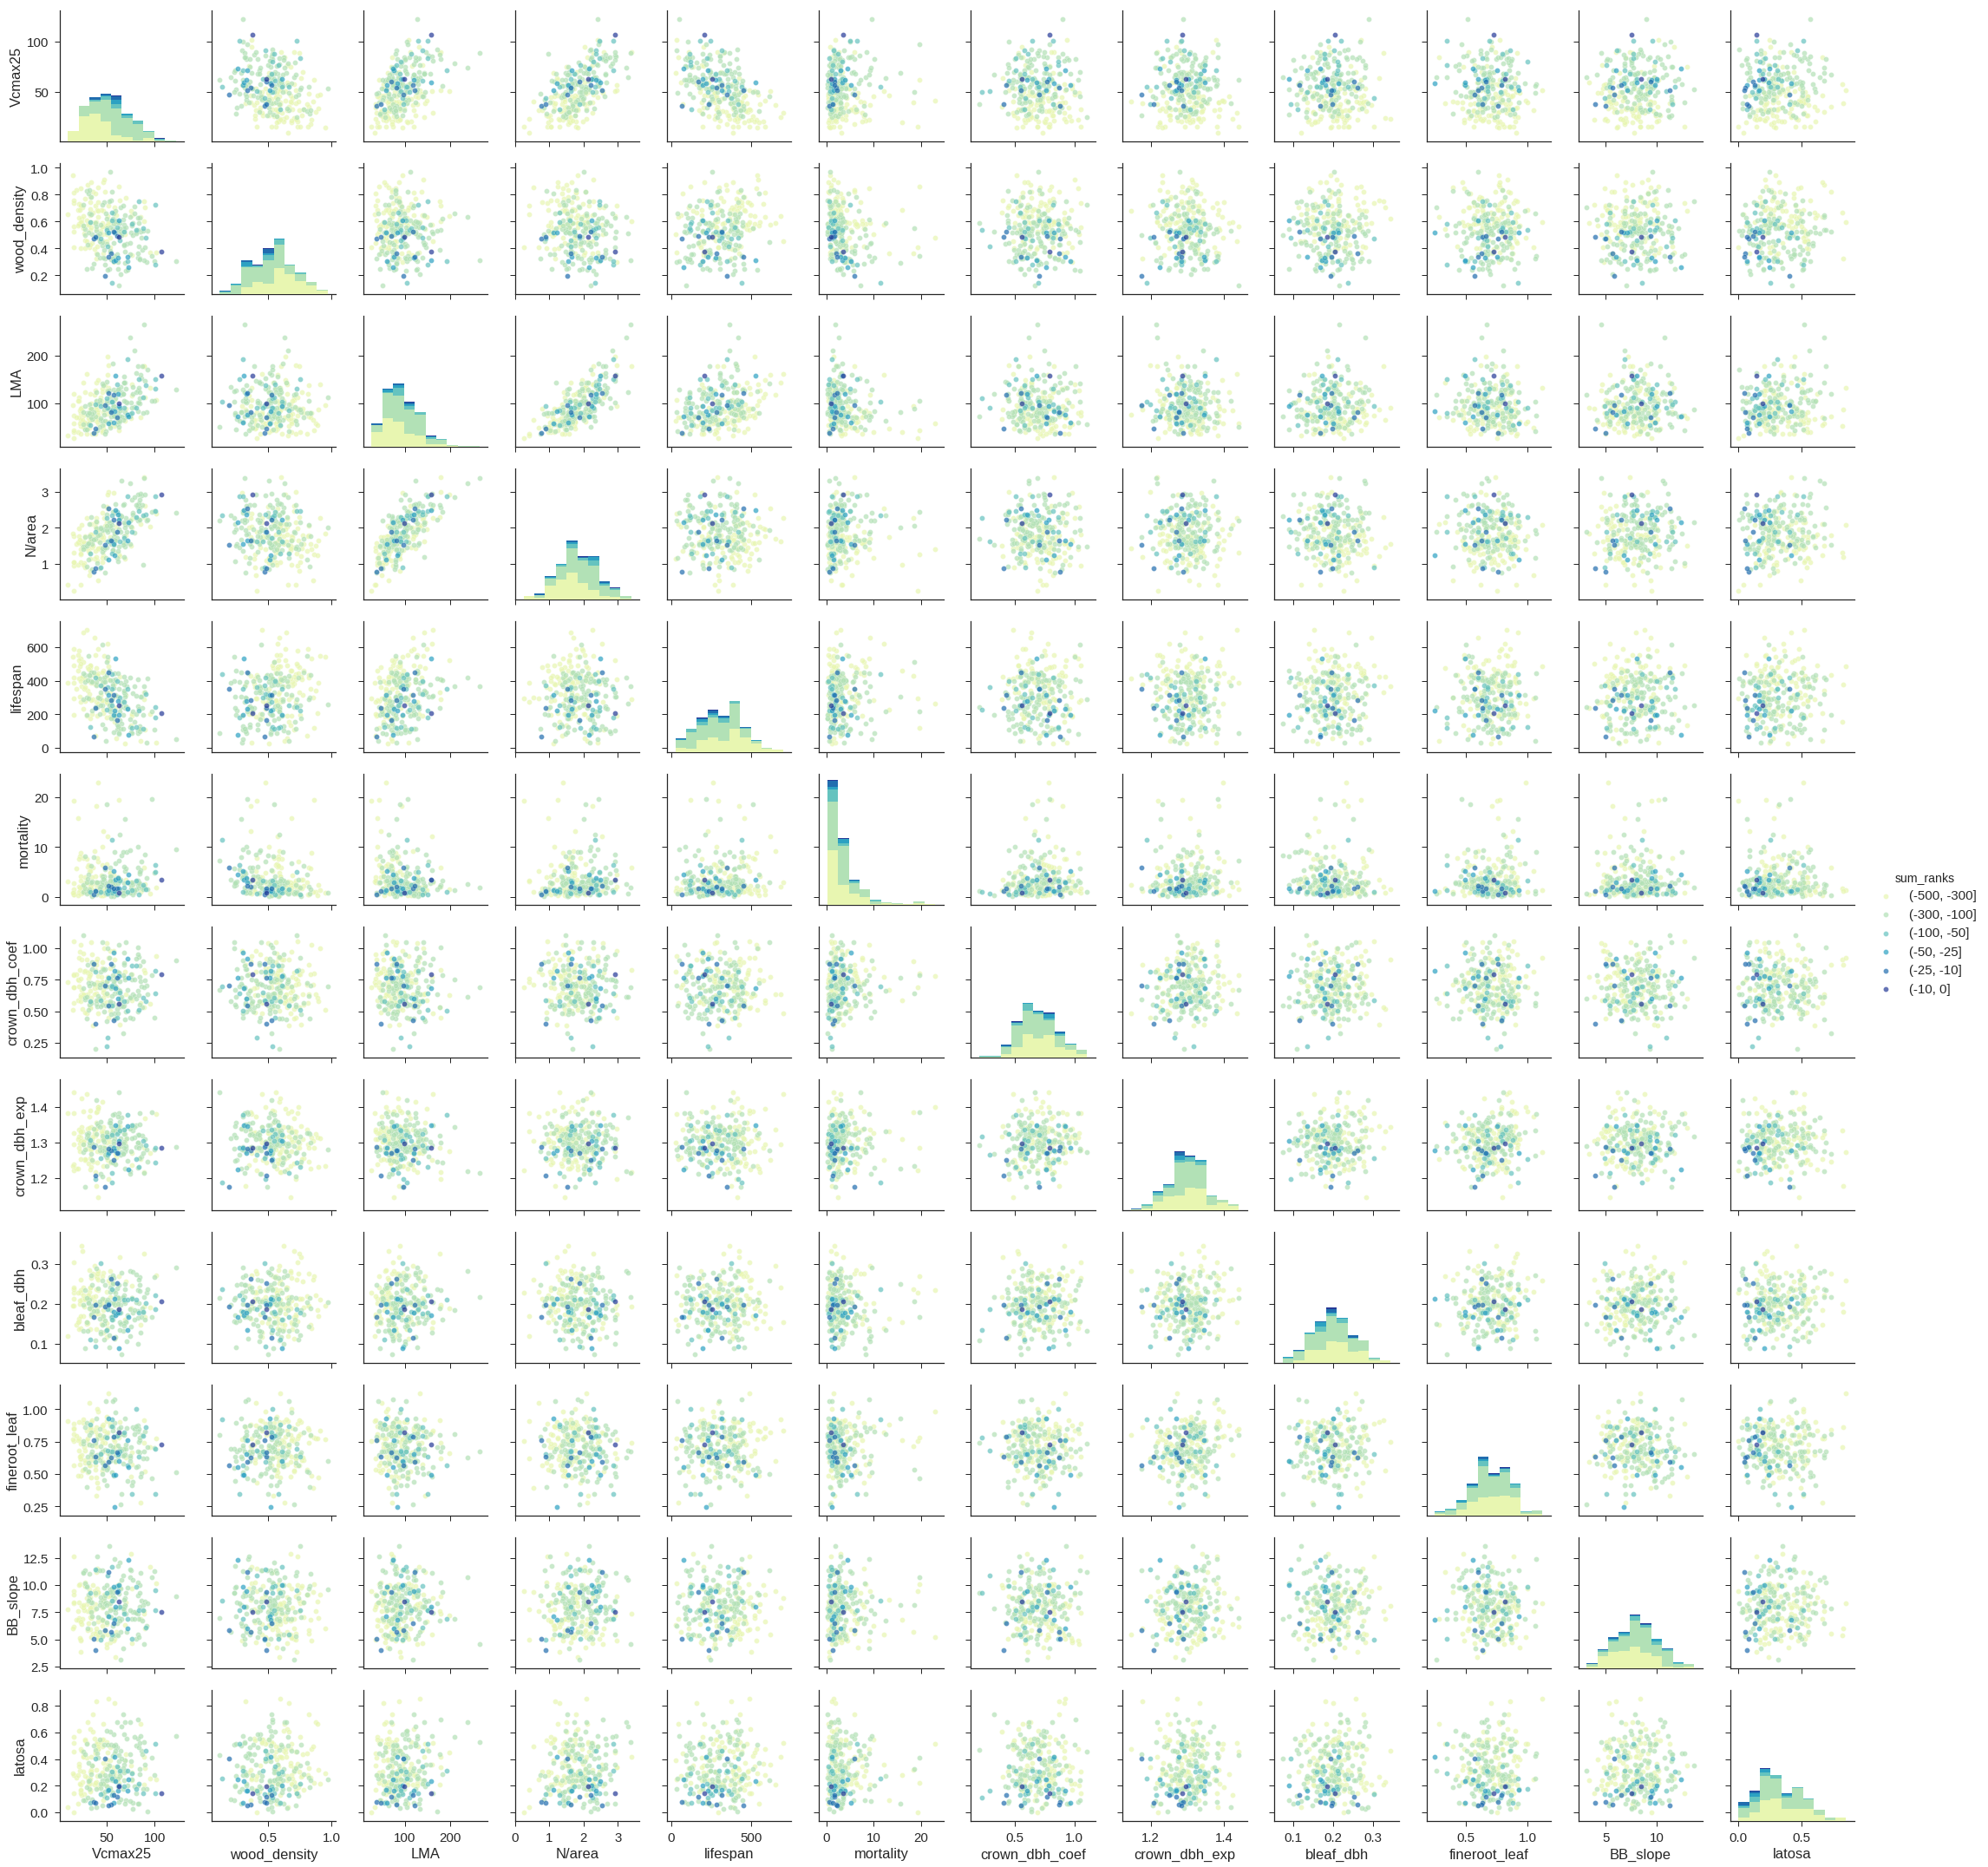

In [52]:
# Plot each ensemble memeber's summed rank (rank for pscore + rank for dscore)
# In this instance we plot the summed rank for Pscore with 10% degradation and Dscore, with weighting favoring structural properties LAI, AGB, and BA.
# However, other ranking metrics (ie. weightings or % degradation) could be plotted by replacing "sum_ranks" below.

# Load trait data
traits_matrix = np.loadtxt('/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/traits_matrix_used_in_param_files_180717.txt')
column_names = ['Vcmax25', 'wood_density', 'LMA', 'N/area','lifespan','mortality','crown_dbh_coef','crown_dbh_exp','bleaf_dbh','fineroot_leaf','BB_slope','latosa']
ncols = len(column_names)
df_traits = pd.DataFrame(traits_matrix, columns=column_names)

# Load the sum of ranks data
# Here we take the negative values so that low ranks (better performers) are plotted last (on top), otherwise they are covered by poor performers.
# Blue = best performers
df_traits["sum_ranks"] = pd.cut(-1*sum_ranks, bins=[-500,-300,-100,-50,-25,-10,0])

# Plot onto trait covariance matrix
sum_ranks_trait_covariance_plot = sns.pairplot(df_traits, hue="sum_ranks",
                 hue_order=df_traits.sum_ranks.cat.categories,
                 palette="YlGnBu",kind="scatter",plot_kws=dict(alpha=0.7))


# Try plotting our top performers with stars
# This code does not work yet. Needs to be updated
topfe_indx = FEindx_SortBest2Worst[:9]
#df_traits_topfe = df_traits(topfe_indx,:)
topfe_scores = np.take(sum_ranks,topfe_indx)
# The following gives an error, need to work on this
#df_traits_topfe = pd.DataFrame(traits_matrix[topfe_indx], columns=column_names)
#df_traits_topfe["sum_ranks"] = pd.cut(sum_ranks[topfe_indx], bins=[0,10,20,30,50,75,100,150,200,250,350,450,550])
#sum_pd10_dscores_plot.data = df_traits_topfe
#sum_pd10_dscores_plot.hue_vals = [1,1,1,1,1]
#sum_pd10_dscores_plot.map_offdiag(plt.scatter, s=500, marker="*")

# See the following example here: https://stackoverflow.com/questions/32008994/seaborn-scatterplot-matrix-adding-extra-points-with-custom-styles
#centroids = pd.DataFrame(km.cluster_centers_, columns=["x", "y", "z"])
#g.data = centroids
#g.hue_vals = [0, 1]
#g.map_offdiag(plt.scatter, s=500, marker="*")


In [53]:
# save image
sum_ranks_trait_covariance_plot.savefig(save_plot_as_skilltraitcovar)

# Same plot as above but for only the 10 Ten Performing Ensemble Members


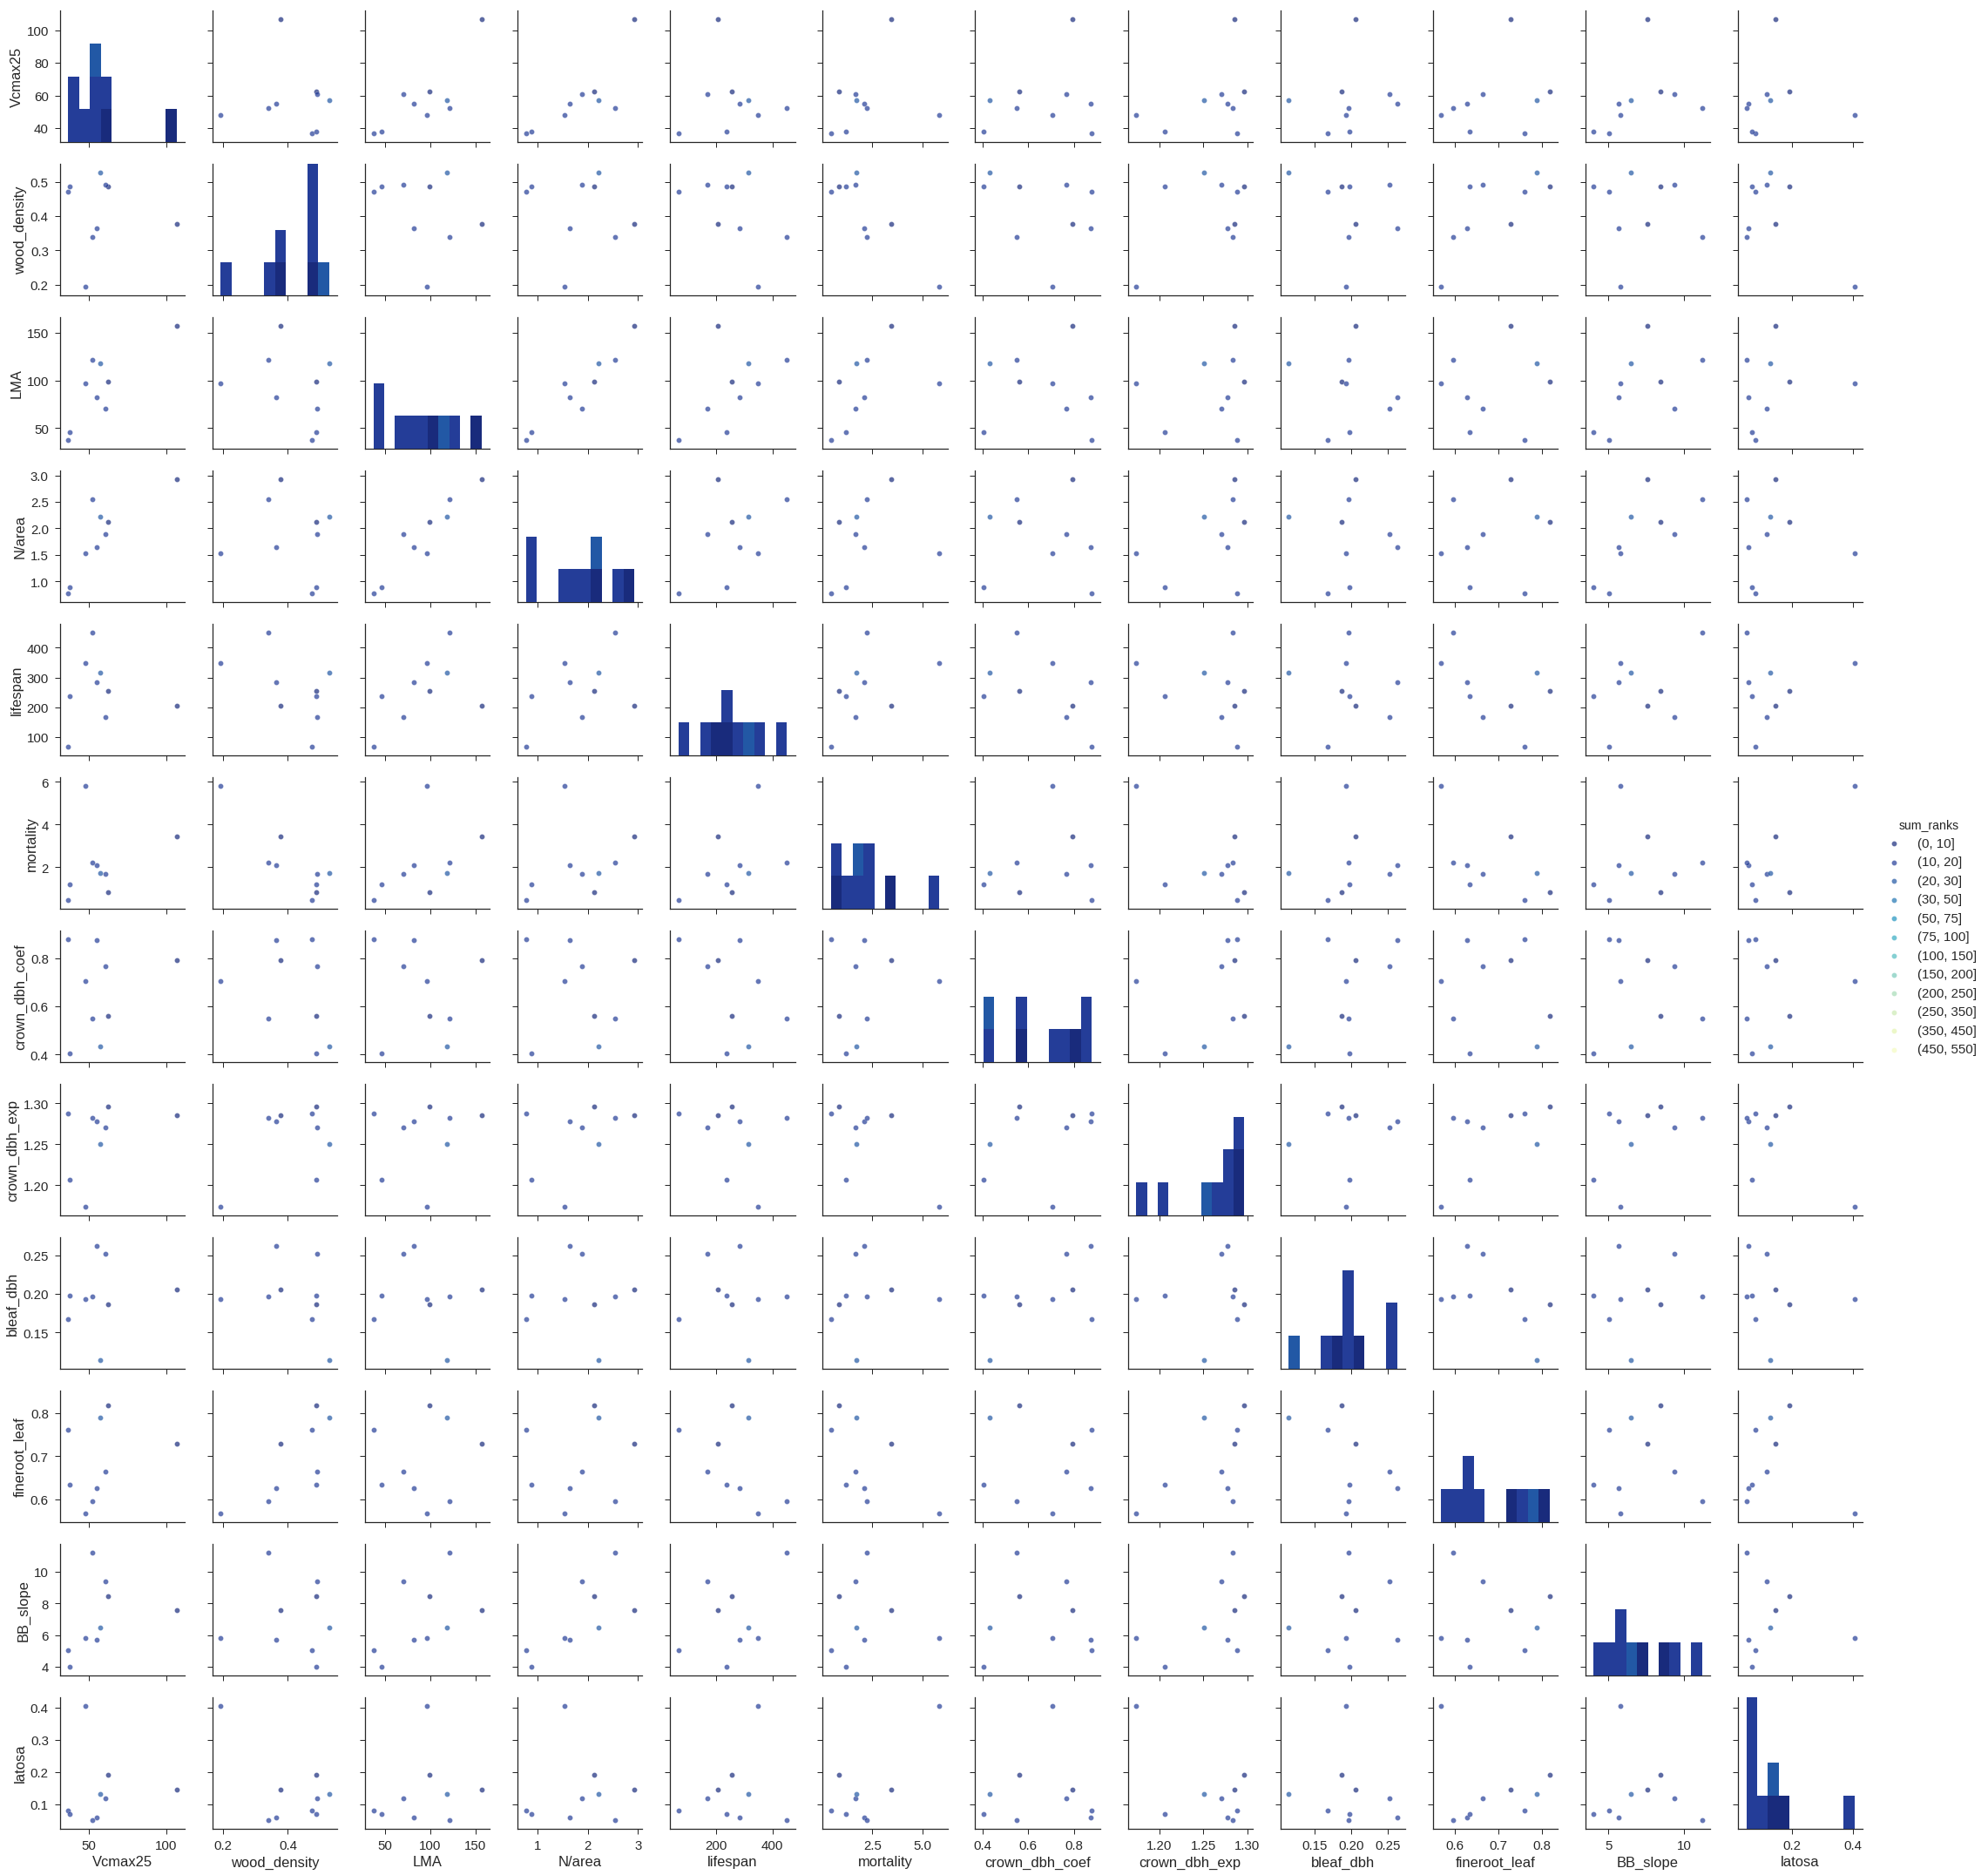

In [54]:
# Plot only the 10 Ten Performing Ensemble Members
# In this instance we plot the summed rank for Pscore with 10% degradation and Dscore, with weighting favoring structural properties LAI, AGB, and BA.

# Load trait data
traits_matrix = np.loadtxt('/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/traits_matrix_used_in_param_files_180717.txt')

column_names = ['Vcmax25', 'wood_density', 'LMA', 'N/area','lifespan','mortality','crown_dbh_coef','crown_dbh_exp','bleaf_dbh','fineroot_leaf','BB_slope','latosa']
ncols = len(column_names)

# Indices of top performers
topfe_indx = FEindx_SortBest2Worst[:9]

df_traits = pd.DataFrame(traits_matrix[topfe_indx], columns=column_names)

df_traits["sum_ranks"] = pd.cut(sum_ranks[topfe_indx], bins=[0,10,20,30,50,75,100,150,200,250,350,450,550])
sum_ranks_trait_covariance_plot_top10 = sns.pairplot(df_traits, hue="sum_ranks",
                 hue_order=df_traits.sum_ranks.cat.categories,
                 palette="YlGnBu_r",kind="scatter",plot_kws=dict(alpha=0.7))

# This plot could be improved by setting the x and y limits to the same values as the trait covariance plots above.
# However this plot may not be necessary if plot stars for top performers on the plot above.

In [55]:
sum_ranks_trait_covariance_plot_top10.savefig(save_plot_as_skilltraitcovar_top10)

# Other Potential Skill Measures
We considered but do not use the following in our selection of the best performing ensemble members:

Kolmogorov-Smirnov Test:
- Measures the goodness of fit between the observed and modeled distribution for each variable.
- Tests if two independent samples (in this case the observations and model output) are likely to be drawn from the same population
- Takes into account measures of central tendency and variance. Sample sizes can differ.
- We chose not to use this measure because we have limited number of observations, which makes it difficult to properly characterize the observed distribution.

Welch's T-Test
- Tests the hypothesis that two samples have the same mean
- Use when have unequal variances and unequal sample sizes (as we do in this analysis)
- Again, we chose not to use this measure because we have limited number of observations, which makes it difficult to properly characterize the observed distribution.

#### Kolmogorov-Smirnov Test (two-sample)

In [56]:
import scipy
from scipy import stats

In [57]:
# Calculate Kolmogorov-Smirnov Statistic and P-value for each ensemble and variable

# Set up output matrices
laijan_ks_pv = np.ma.masked_all([nens,2])
laiaug_ks_pv = np.ma.masked_all([nens,2])
agb_ks_pv = np.ma.masked_all([nens,2])
ba_ks_pv = np.ma.masked_all([nens,2])
gppjul_ks_pv = np.ma.masked_all([nens,2])
gppaug_ks_pv = np.ma.masked_all([nens,2])
lejul_ks_pv = np.ma.masked_all([nens,2])
leaug_ks_pv = np.ma.masked_all([nens,2])
hjul_ks_pv = np.ma.masked_all([nens,2])
haug_ks_pv = np.ma.masked_all([nens,2])

# Calculate KS statistic and P-value
# Each of the following results gives [KS statistic, pvalue]
# where KS statistic = max difference in cdf between the two samples (0= no difference, 1 largest difference)
# p-value = probability that samples are from same population (small pvalue = samples from different populations)
for i in range(nens):
    # LAI with 2 different start dates (Jan, Aug)
    laijan_ks_pv[i,:] = scipy.stats.ks_2samp(lai_annmean_janstart,fe_lai_annmeants[i,:])
    laiaug_ks_pv[i,:] = scipy.stats.ks_2samp(lai_annmean_augstart,fe_lai_annmeants[i,:])
    #AGB and BA
    agb_ks_pv[i,:] = scipy.stats.ks_2samp(agb_cbiomass_obs,fe_agb_annts[i,:])
    ba_ks_pv[i,:] = scipy.stats.ks_2samp(basalarea_obs,fe_ba_annts[i,:])
    # GPP, LE, and H with 2 different start dates (July, Aug)
    gppjul_ks_pv[i,:] = scipy.stats.ks_2samp(gpp_annmean_julystart,fe_gpp_annmeants[i,:])
    gppaug_ks_pv[i,:] = scipy.stats.ks_2samp(gpp_annmean_augstart,fe_gpp_annmeants[i,:])
    
    lejul_ks_pv[i,:] = scipy.stats.ks_2samp(le_annmean_julystart,fe_le_annmeants[i,:])
    leaug_ks_pv[i,:] = scipy.stats.ks_2samp(le_annmean_augstart,fe_le_annmeants[i,:])
    
    hjul_ks_pv[i,:] = scipy.stats.ks_2samp(h_annmean_julystart,fe_h_annmeants[i,:])
    haug_ks_pv[i,:] = scipy.stats.ks_2samp(h_annmean_augstart,fe_h_annmeants[i,:])

set

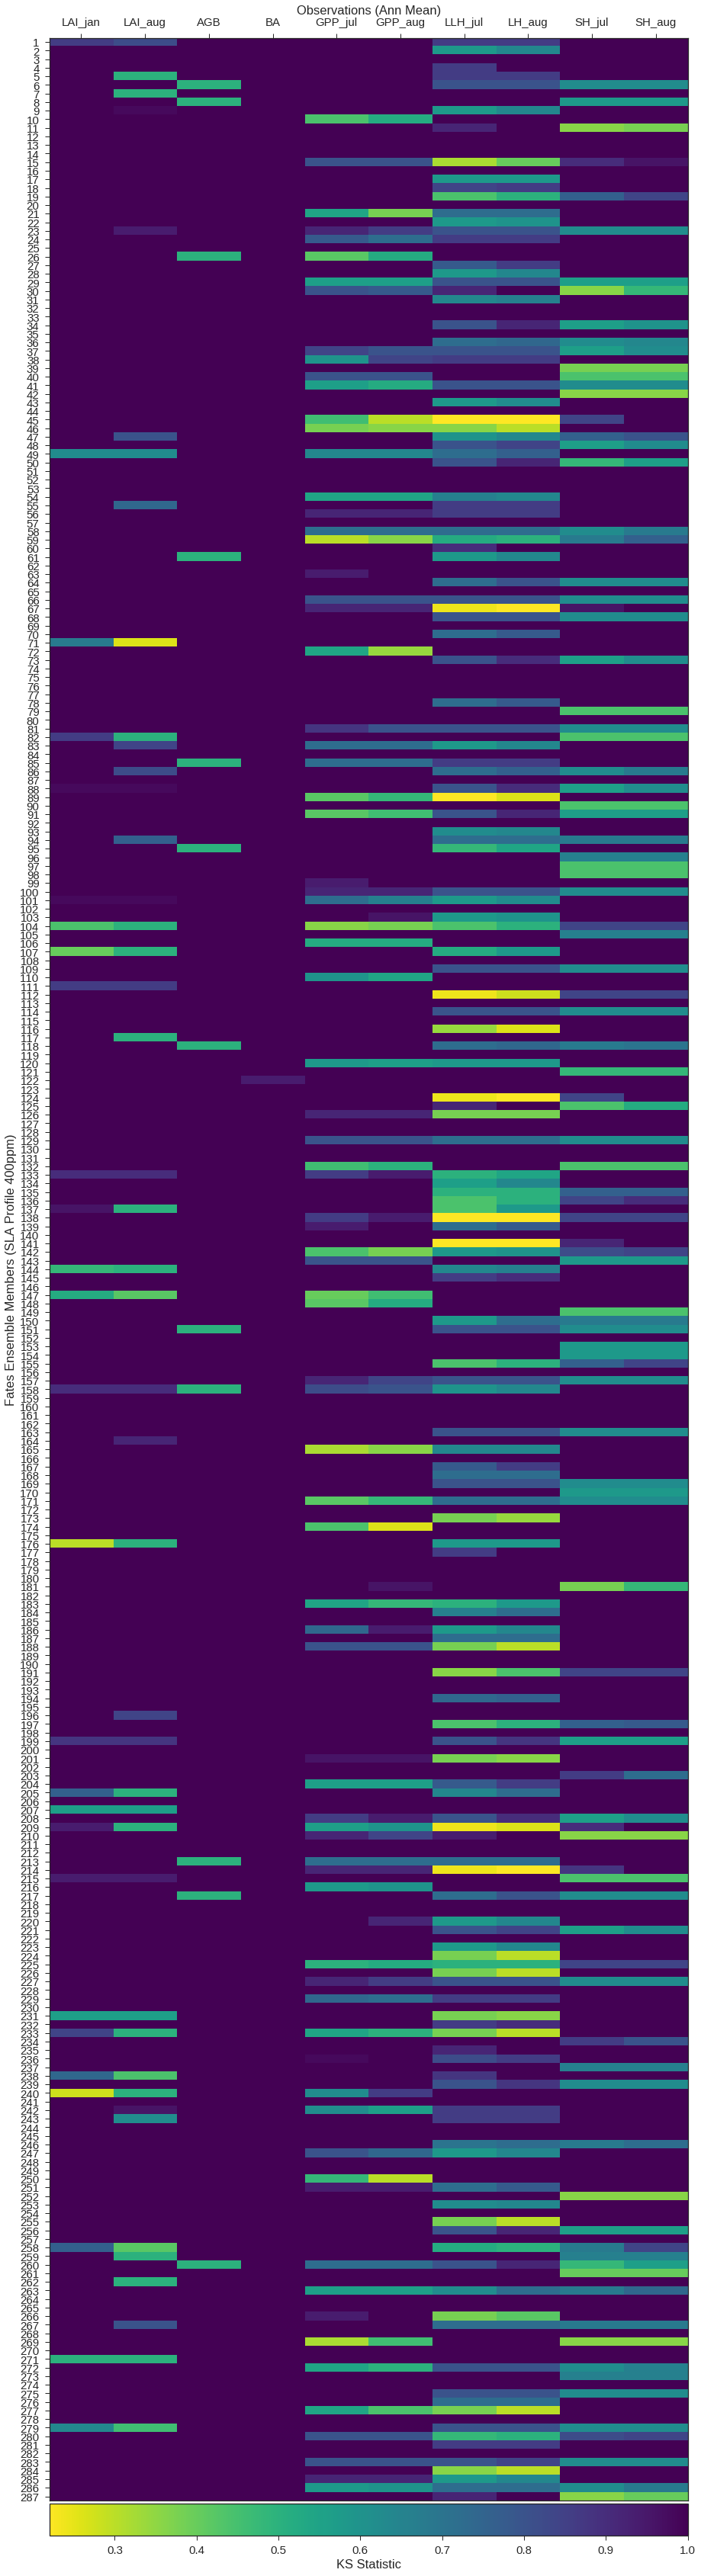

In [58]:
#Heatmap for KS scores
# A score near 0 means the distributions are similar, near 1 means sample distributions are unlikely to come from same population
heatdata = (np.stack((
            laijan_ks_pv[:,0],
            laiaug_ks_pv[:,0],
            agb_ks_pv[:,0],
            ba_ks_pv[:,0],
            gppjul_ks_pv[:,0],
            gppaug_ks_pv[:,0],
            lejul_ks_pv[:,0],
            leaug_ks_pv[:,0],
            hjul_ks_pv[:,0],
            haug_ks_pv[:,0]),
    axis=1))

ens = [str(x) for x in range(1,288)]
obs = ["LAI_jan",
       "LAI_aug",
       "AGB",
       "BA",
       "GPP_jul",
       "GPP_aug",
       "LLH_jul",
       "LH_aug",
       "SH_jul",
       "SH_aug",]

fig, ax = plt.subplots(figsize=(15,70))
im = ax.imshow(heatdata,cmap="viridis_r",aspect='auto')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax,orientation="horizontal", pad=0.001)
cbar.ax.set_xlabel('KS Statistic')

ax.set_xlabel('Observations (Ann Mean)')
ax.set_xticks(np.arange(len(obs)))
ax.xaxis.tick_top()
ax.set_xticklabels(obs)
ax.xaxis.set_label_position('top')

ax.set_ylabel(heatmap_ylabel)
ax.set_yticks(np.arange(len(ens)))
ax.set_yticklabels(ens)
set


In [59]:
# save image
fig.savefig(save_plot_as_ks_score, bbox_inches='tight')

#### Welch's t-test

In [60]:
# Calculate Welch's t-test (ok for unequal n, unequal var)
# low Welch's t = small difference in means
# high p-value = means are not statitstically different

# Set up output matrices
laijan_t_pv = np.ma.masked_all([nens,2])
laiaug_t_pv = np.ma.masked_all([nens,2])  
agb_t_pv = np.ma.masked_all([nens,2])
ba_t_pv = np.ma.masked_all([nens,2])
gppjul_t_pv = np.ma.masked_all([nens,2])
gppaug_t_pv = np.ma.masked_all([nens,2])
lejul_t_pv = np.ma.masked_all([nens,2])
leaug_t_pv = np.ma.masked_all([nens,2])
hjul_t_pv = np.ma.masked_all([nens,2])
haug_t_pv = np.ma.masked_all([nens,2])

# Calculate Welch's T-statistic and P-value
# Each of the following results gives [T-statistic, pvalue]
for i in range(nens):
    laijan_t_pv[i,:] = scipy.stats.ttest_ind(lai_annmean_janstart,np.squeeze(fe_lai_annmeants[i,:]),axis=0,equal_var=False,nan_policy='omit')
    laiaug_t_pv[i,:] = scipy.stats.ttest_ind(lai_annmean_augstart,np.squeeze(fe_lai_annmeants[i,:]),axis=0,equal_var=False,nan_policy='omit')
    
    agb_t_pv[i,:] = scipy.stats.ttest_ind(agb_cbiomass_obs,np.squeeze(fe_agb_annts[i,:]),axis=0,equal_var=False,nan_policy='omit')
    ba_t_pv[i,:] = scipy.stats.ttest_ind(basalarea_obs,np.squeeze(fe_ba_annts[i,:]),axis=0,equal_var=False,nan_policy='omit')
    
    gppjul_t_pv[i,:] = scipy.stats.ttest_ind(gpp_annmean_julystart,np.squeeze(fe_gpp_annmeants[i,:]),axis=0,equal_var=False,nan_policy='omit')
    gppaug_t_pv[i,:] = scipy.stats.ttest_ind(gpp_annmean_augstart,np.squeeze(fe_gpp_annmeants[i,:]),axis=0,equal_var=False,nan_policy='omit')
    
    lejul_t_pv[i,:] = scipy.stats.ttest_ind(le_annmean_julystart,np.squeeze(fe_le_annmeants[i,:]),axis=0,equal_var=False,nan_policy='omit')
    leaug_t_pv[i,:] = scipy.stats.ttest_ind(le_annmean_augstart,np.squeeze(fe_le_annmeants[i,:]),axis=0,equal_var=False,nan_policy='omit')
    
    hjul_t_pv[i,:] = scipy.stats.ttest_ind(h_annmean_julystart,np.squeeze(fe_h_annmeants[i,:]),axis=0,equal_var=False,nan_policy='omit')
    haug_t_pv[i,:] = scipy.stats.ttest_ind(h_annmean_augstart,np.squeeze(fe_h_annmeants[i,:]),axis=0,equal_var=False,nan_policy='omit')


set

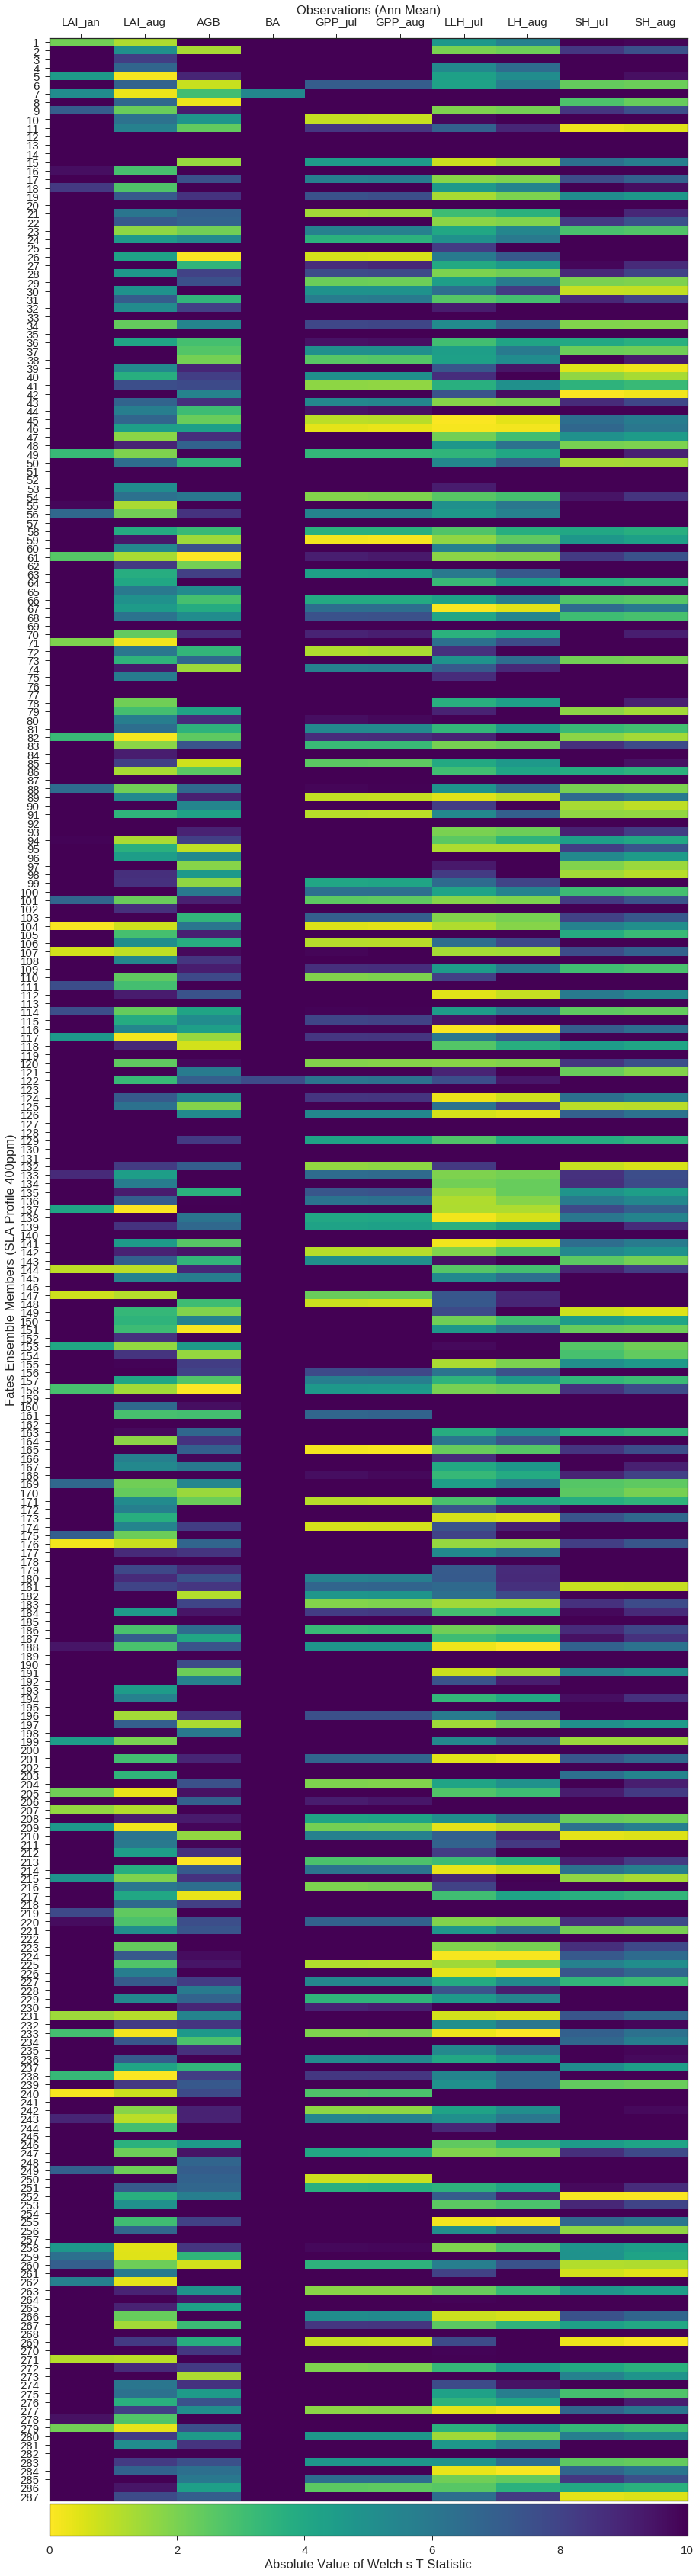

In [61]:
#Heatmap for Welch's T scores
heatdata = (np.stack((
            abs(laijan_t_pv[:,0]),
            abs(laiaug_t_pv[:,0]),
            abs(agb_t_pv[:,0]),
            abs(ba_t_pv[:,0]),
            abs(gppjul_t_pv[:,0]),
            abs(gppaug_t_pv[:,0]),
            abs(lejul_t_pv[:,0]),
            abs(leaug_t_pv[:,0]),
            abs(hjul_t_pv[:,0]),
            abs(haug_t_pv[:,0])),
    axis=1))

ens = [str(x) for x in range(1,288)]
obs = ["LAI_jan",
       "LAI_aug",
       "AGB",
       "BA",
       "GPP_jul",
       "GPP_aug",
       "LLH_jul",
       "LH_aug",
       "SH_jul",
       "SH_aug",]

fig, ax = plt.subplots(figsize=(15,70))
im = ax.imshow(heatdata,vmin = 0, vmax = 10,cmap="viridis_r",aspect='auto')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax,orientation="horizontal", pad=0.001)
cbar.ax.set_xlabel('Absolute Value of Welch s T Statistic')

ax.set_xlabel('Observations (Ann Mean)')
ax.set_xticks(np.arange(len(obs)))
ax.xaxis.tick_top()
ax.set_xticklabels(obs)
ax.xaxis.set_label_position('top')

ax.set_ylabel(heatmap_ylabel)
ax.set_yticks(np.arange(len(ens)))
ax.set_yticklabels(ens)
set


# To see KS and Welch's T Statistics for specific ensemble member(s), enter the index number(s) below.

In [62]:
# Scores by Member INDEX
# enter ensemble member index here
memind = 1

# Print scores
print("KSscores, pval")
print(laijan_ks_pv[memind])
print(laiaug_ks_pv[memind])
print(agb_ks_pv[memind])
print(ba_ks_pv[memind])
print(gppjul_ks_pv[memind])
print(gppaug_ks_pv[memind])
print(lejul_ks_pv[memind])
print(leaug_ks_pv[memind])
print(hjul_ks_pv[memind])
print(haug_ks_pv[memind])

print("")

print("Welch's Tscores, pval")
print(laijan_t_pv[memind])
print(laiaug_t_pv[memind])
print(agb_t_pv[memind])
print(ba_t_pv[memind])
print(gppjul_t_pv[memind])
print(gppaug_t_pv[memind])
print(lejul_t_pv[memind])
print(leaug_t_pv[memind])
print(hjul_t_pv[memind])
print(haug_t_pv[memind])


KSscores, pval
[1.0 0.013061245383604762]
[1.0 0.013061245383604762]
[1.0 0.013061245383604762]
[1.0 4.9180431660079046e-05]
[1.0 4.9180431660079046e-05]
[1.0 4.9180431660079046e-05]
[0.58 0.056295380774948015]
[0.64 0.02588721368437899]
[1.0 4.9180431660079046e-05]
[1.0 4.9180431660079046e-05]

Welch's Tscores, pval
[20.81550918218631 0.023274645261000752]
[5.007680052345492 0.12480701844465457]
[1.3256580141500767 0.4114096643153745]
[91.38254053629416 8.685210558872763e-09]
[-13.142898796508405 8.962711183427749e-05]
[-13.22314560280227 8.58202417476576e-05]
[1.9928295837219834 0.105990407864887]
[2.1877991712992957 0.07729742371625772]
[-8.367507874806003 5.5193837897493066e-05]
[-7.540388257690795 0.00022816657542629515]


# Plot Time Series for variables used to evaluate ensemble members

set

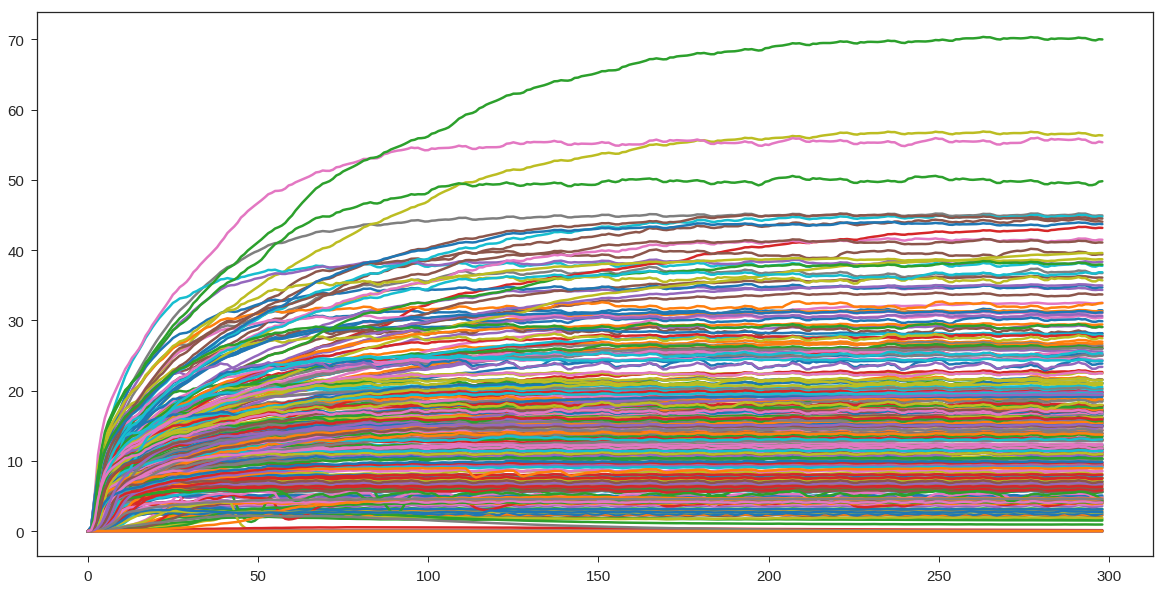

In [63]:
# Plot ann mean BA over entire simulation period to ensure comes into equilibrium by last 50 years
ba_annts_longts = np.squeeze(np.nansum((histfile1.variables['BA_SCLS'][:,:int(endyear),:]),axis=2)) # m2/ha
years = np.arange(299)
plt.figure(figsize=(20,10))
plt.plot(years,ba_annts_longts.transpose())
set

set

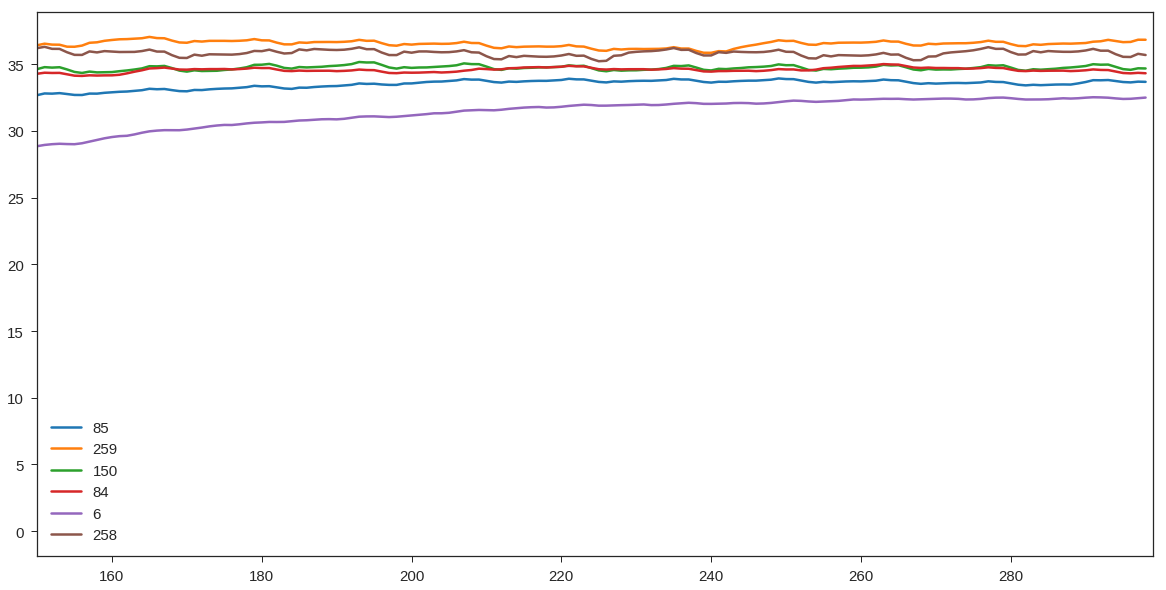

In [64]:
# Plot ann mean BA over entire simulation period for TOP 10 PERFORMERS
# Specify indices for top 10 performers
selected_fe_indx = [85,259,150,84,6,258]

# Load data
ba_annts_longts = np.squeeze(np.nansum((histfile1.variables['BA_SCLS'][selected_fe_indx,:int(endyear),:]),axis=2)) # m2/ha
years = np.arange(299)

# Plot
plt.figure(figsize=(20,10))
plt.plot(years,ba_annts_longts.transpose())
#plt.ylim([25,39])
plt.xlim(150,299)
plt.legend(['85','259','150','84','6','258'])
set

set

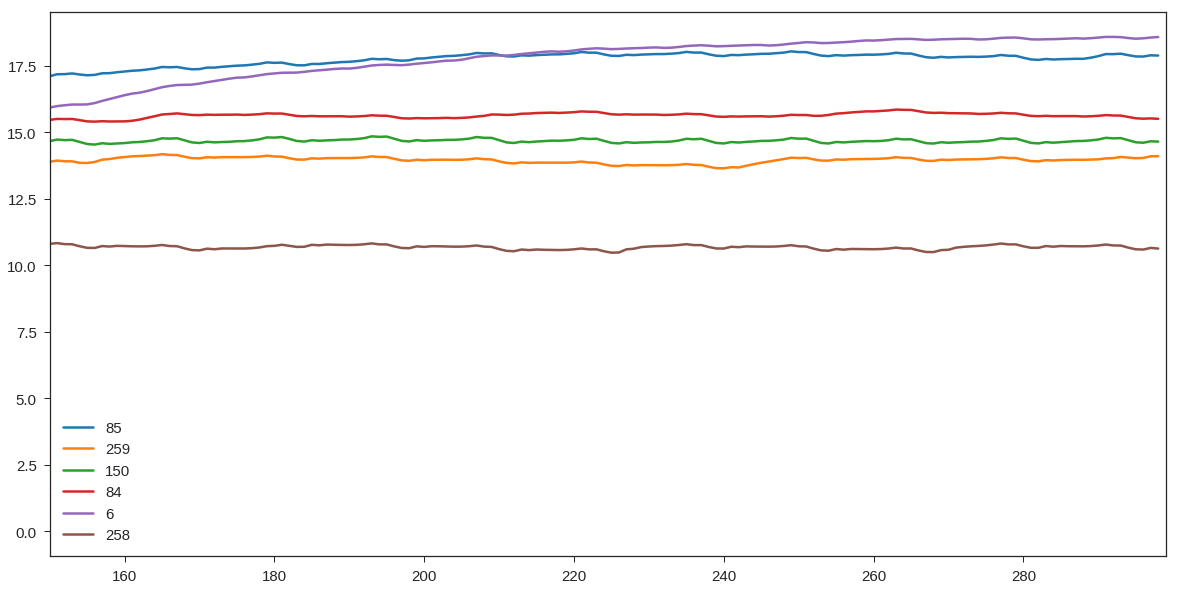

In [65]:
# Plot ann mean AGB over entire simulation period for TOP 10 PERFORMERS
# Specify indices for top 10 performers
selected_fe_indx = [85,259,150,84,6,258]

# Load Data
ba_annts_longts = np.squeeze(np.nansum((histfile1.variables['AGB_SCLS'][selected_fe_indx,:int(endyear),:]),axis=2)) # m2/ha
years = np.arange(299)

# Plot
plt.figure(figsize=(20,10))
plt.plot(years,ba_annts_longts.transpose())
#plt.ylim([25,39])
plt.xlim(150,299)

plt.legend(['85','259','150','84','6','258'])
set

set

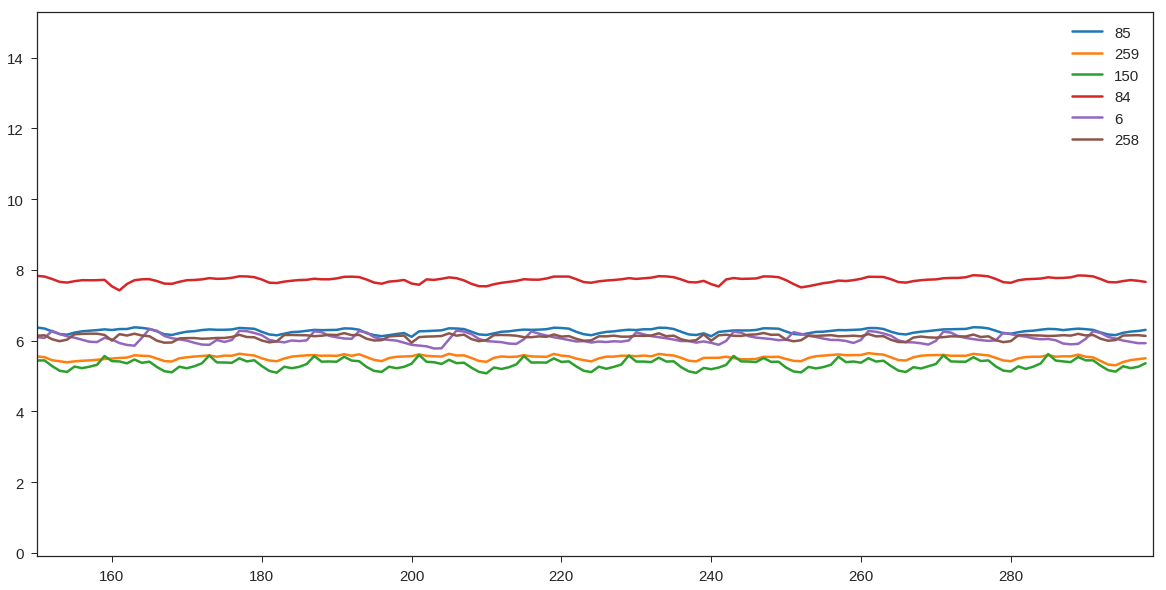

In [66]:
# Plot ann mean LAI over entire simulation period for TOP 10 PERFORMERS
# Specify indices for top 10 performers
selected_fe_indx = [85,259,150,84,6,258]

# Load Data
lai_mthts_longts = histfile0.variables['TLAI'][selected_fe_indx,offset:int(offset+(endyear)*12),0]
lai_yrmth_longts = np.reshape(lai_mthts_longts,(len(lai_mthts_longts),-1,12))
lai_annmeants_longts = np.nanmean(lai_yrmth_longts,axis=2)
lai_annmeants_longts.shape
years = np.arange(299)

# Plot
plt.figure(figsize=(20,10))
plt.plot(years,lai_annmeants_longts.transpose())
#plt.ylim([25,39])
plt.xlim(150,299)
plt.legend(['85','259','150','84','6','258'])
set

set

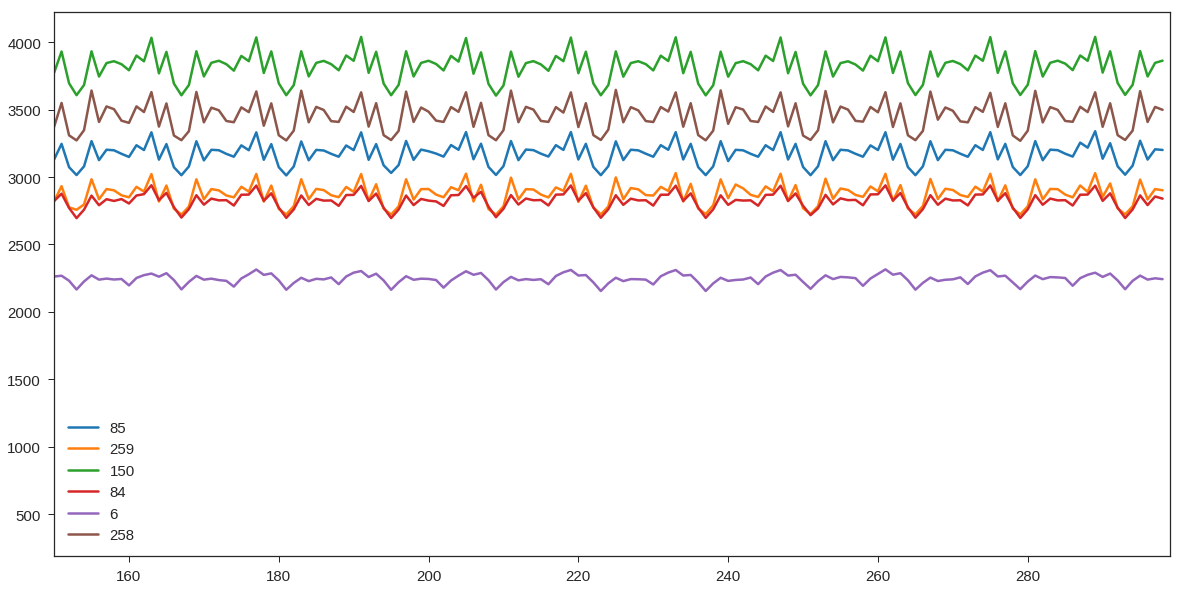

In [67]:
# Plot ann mean GPP over entire simulation period for TOP 10 PERFORMERS
# Specify indices for top 10 performers
selected_fe_indx = [85,259,150,84,6,258]

# Load Data
gpp_mthts_longts = histfile0.variables['GPP'][selected_fe_indx,offset:int(offset+(endyear)*12),0]* 86400 *365
gpp_yrmth_longts = np.reshape(gpp_mthts_longts,(len(gpp_mthts_longts),-1,12))
gpp_annmeants_longts = np.nanmean(gpp_yrmth_longts,axis=2)
gpp_annmeants_longts.shape
years = np.arange(299)

# Plot
plt.figure(figsize=(20,10))
plt.plot(years,gpp_annmeants_longts.transpose())
#plt.ylim([25,39])
plt.xlim(150,299)
plt.legend(['85','259','150','84','6','258'])
set

set

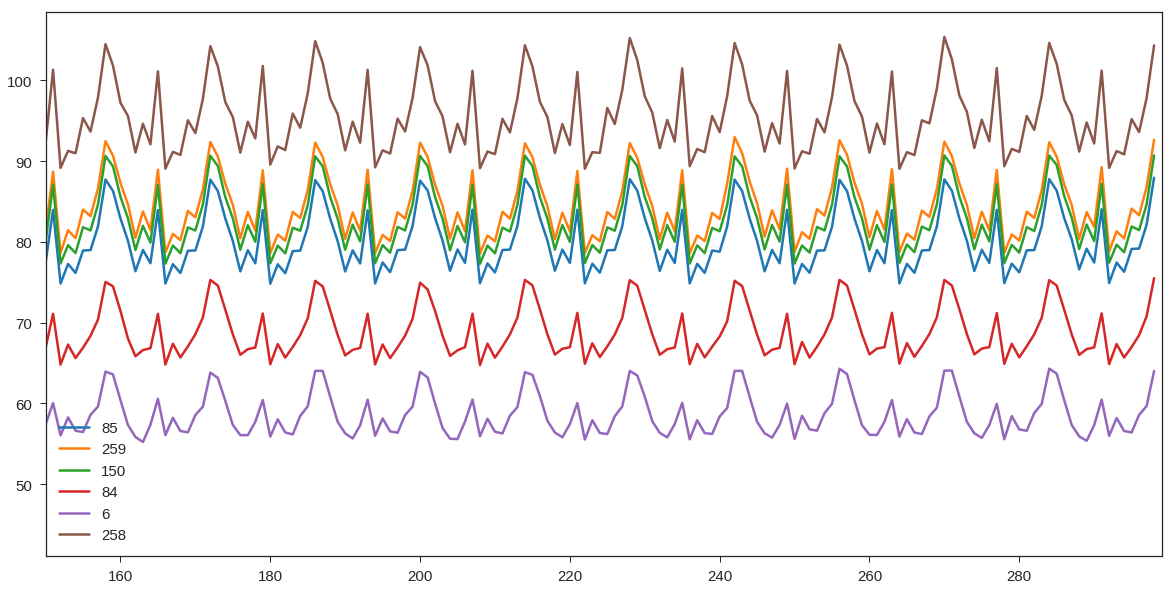

In [68]:
# Plot ann mean LE over entire simulation period for TOP 10 PERFORMERS
# Specify indices for top 10 performers
selected_fe_indx = [85,259,150,84,6,258]

# Load Data
le_mthts_longts = (histfile0.variables['FCTR'][selected_fe_indx,offset:int(offset+(endyear)*12),0]
+histfile0.variables['FGEV'][selected_fe_indx,offset:int(offset+(endyear)*12),0]
+histfile0.variables['FCEV'][selected_fe_indx,offset:int(offset+(endyear)*12),0])
le_yrmth_longts = np.reshape(le_mthts_longts,(len(le_mthts_longts),-1,12))
le_annmeants_longts = np.nanmean(le_yrmth_longts,axis=2)
le_annmeants_longts.shape
years = np.arange(299)

# Plot data
plt.figure(figsize=(20,10))
plt.plot(years,le_annmeants_longts.transpose())
#plt.ylim([25,39])
plt.xlim(150,299)
plt.legend(['85','259','150','84','6','258'])
set

set

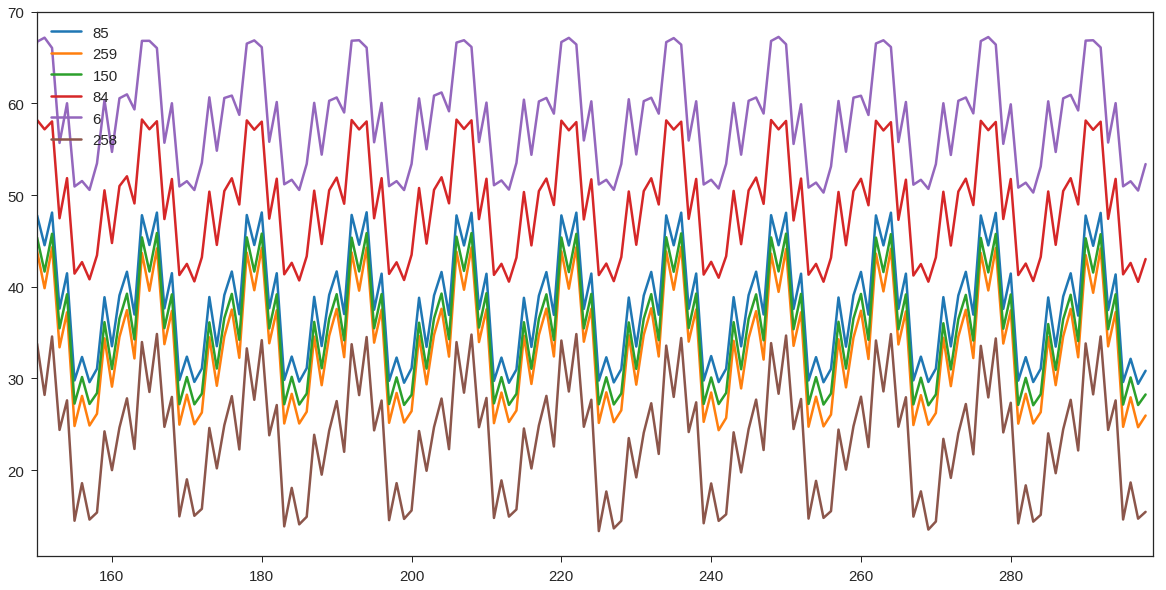

In [69]:
# Plot ann mean H over entire simulation period for TOP 10 PERFORMERS
# Specify indices for top 10 performers
selected_fe_indx = [85,259,150,84,6,258]

# Load Data
h_mthts_longts = histfile0.variables['FSH'][selected_fe_indx,offset:int(offset+(endyear)*12),0]
h_yrmth_longts = np.reshape(h_mthts_longts,(len(h_mthts_longts),-1,12))
h_annmeants_longts = np.nanmean(h_yrmth_longts,axis=2)
h_annmeants_longts.shape
years = np.arange(299)

# Plot
plt.figure(figsize=(20,10))
plt.plot(years,h_annmeants_longts.transpose())
#plt.ylim([25,39])
plt.xlim(150,299)
plt.legend(['85','259','150','84','6','258'])
set

# Compare Selected Ensemble Member model output to observations that were not used to evaluate their performance:

We selected 3 ensemble members as the best performers as they consistently performed in the top 10 regardless of weighting, pscore degradation and CO2 level.
They were ensemble members 86, 151, and 260 (index numbers 85, 150, and 259)

#### Leaf Height Distributions

Text(0.8,43,'Selected FATES ensemble members')

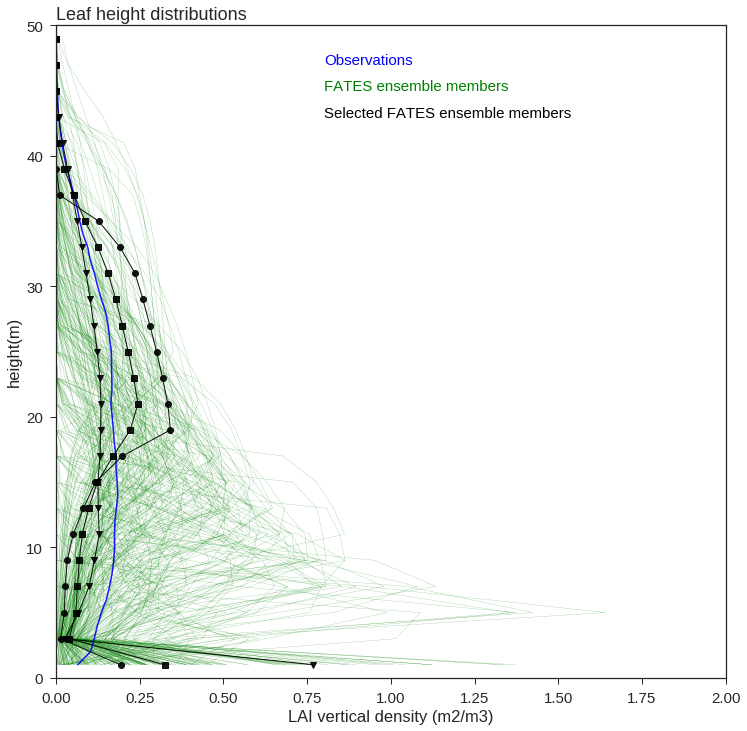

In [70]:
# Plot leaf height distributions
heightlevs = histfile1.variables['fates_levheight'][:]
dz = heightlevs[1]-heightlevs[0]
heightlevs_midpoint = dz/2. + heightlevs

### load LIDAR estimate of LAD from Detto et al 2015
filename_lidar_leafareadens = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/benchmark_datasets/LAD.csv'
lidar_leafareadens_file = pd.read_csv(filename_lidar_leafareadens)
#print(lidar_leafareadens_file.dtypes)
#print(lidar_leafareadens_file['Height (m)'].values)
#print(lidar_leafareadens_file['LAD'].values)


leafheight = histfile1.variables['LEAF_HEIGHT_DIST'][:,int(startyear):int(endyear),:,0].mean(axis=1) / dz

fig=plt.figure(figsize=(12, 12))

for column in range(nens):
    plt.plot(leafheight[column,:], heightlevs_midpoint[:], marker='', linewidth=0.15, alpha=0.9, color='green')

    
plt.plot(lidar_leafareadens_file['LAD'], 1.*lidar_leafareadens_file['Height (m)'], marker='', linewidth=1.5, alpha=0.9, color='blue')

# Plot top ensemble performers
plt.plot(leafheight[85,:], heightlevs_midpoint[:], marker='o', linewidth=1, alpha=0.9, color='black')
plt.plot(leafheight[259,:], heightlevs_midpoint[:], marker='s', linewidth=1, alpha=0.9, color='black')
plt.plot(leafheight[150,:], heightlevs_midpoint[:], marker='v', linewidth=1, alpha=0.9, color='black')
#plt.plot(leafheight[84,:], heightlevs_midpoint[:], marker='', linewidth=1, alpha=0.9, color='red')

plt.title("Leaf height distributions", loc='left')
plt.xlabel("LAI vertical density (m2/m3)")
plt.ylabel("height(m)")
plt.ylim(0.,50.)
plt.xlim(0.,2.)
plt.text(0.8, 47, 'Observations', color ='blue', fontsize=15)
plt.text(0.8, 45, 'FATES ensemble members', color ='green', fontsize=15)
plt.text(0.8, 43, 'Selected FATES ensemble members', color ='black', fontsize=15)

#### Tree Size Distribution

Text(20,4000,'Selected FATES ensemble members')

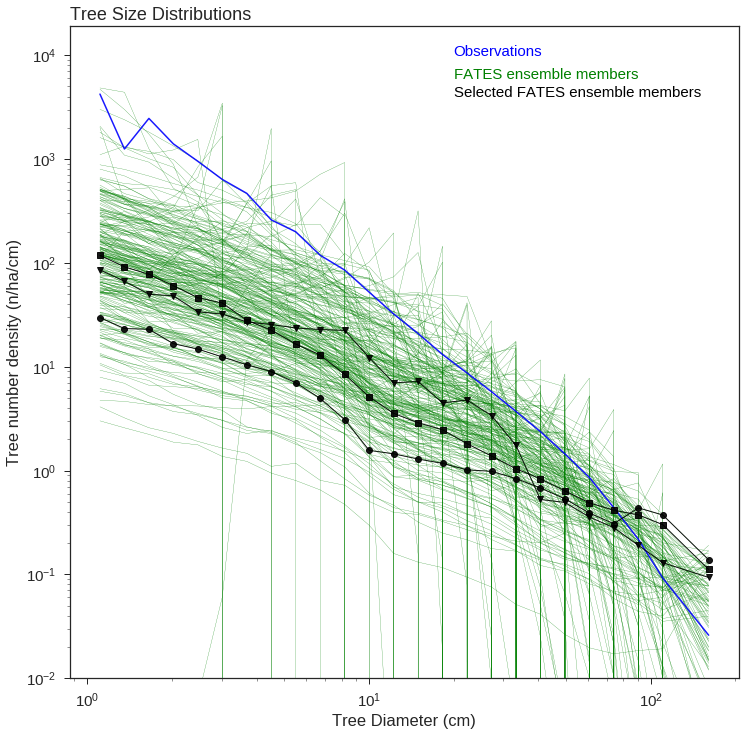

In [71]:
# Plot tree size distributions
nplant_scls = histfile1.variables['NPLANT_SCLS']
fates_levscls = histfile1.variables['fates_levscls'][:]

nlevscls= len(fates_levscls)

levscls_ext = np.append(fates_levscls,200.)
dlevscls = levscls_ext[1:] - levscls_ext[0:len(levscls_ext)-1]
levscls_mid = fates_levscls + dlevscls/2.
levscls_ext_logscale = levscls_ext.copy()
levscls_ext_logscale[0] = .5

nplant_scls_timeave = nplant_scls[:, int(startyear):int(endyear),:,0].mean(axis=1)

nplant_scls_timeave_n_percm =  nplant_scls_timeave/dlevscls

## open BCI inventory data plot                                                                                                                                 
filename_bci_inventory = '/home/disk/eos3/kovenock/matlab/aim3_fates_lma/fates_output/bci_testbed/benchmark_datasets/census_bmks_bci_171208.nc'
fin_bci_inv = nc4.Dataset(filename_bci_inventory)

## load size distributions from census data
sizedist_inv = fin_bci_inv.variables['abund_by_size_census'][:,:,1]
sizedist_inv_timeave = sizedist_inv[2:,:].mean(axis=0)

# get error on obs and ready that too                                                                                                                           
sizedist_inv_error_ll = np.ma.masked_all([2,len(levscls_mid)-1])
sizedist_inv_error_ul = np.ma.masked_all([2,len(levscls_mid)-1])
sizedist_inv_error_ll[1,:] = fin_bci_inv.variables['abund_by_size_census'][2:,:,0].min(axis=0)/dlevscls[1:]
sizedist_inv_error_ul[1,:] = fin_bci_inv.variables['abund_by_size_census'][2:,:,2].max(axis=0)/dlevscls[1:]

fig=plt.figure(figsize=(12, 12))

for column in range(nens):
    plt.loglog(levscls_mid[1:], nplant_scls_timeave_n_percm[column,1:], marker='', linewidth=0.25, alpha=0.9, color='green')

plt.loglog(levscls_mid[1:], sizedist_inv[:].mean(axis=0)/dlevscls[1:], marker='', linewidth=1.5, alpha=0.9, color='blue')

# plot selected fates ensemble members
plt.loglog(levscls_mid[1:], nplant_scls_timeave_n_percm[85,1:], marker='o', linewidth=1, alpha=0.9, color='black')
plt.loglog(levscls_mid[1:], nplant_scls_timeave_n_percm[259,1:], marker='s', linewidth=1, alpha=0.9, color='black')
plt.loglog(levscls_mid[1:], nplant_scls_timeave_n_percm[150,1:], marker='v', linewidth=1, alpha=0.9, color='black')
#plt.loglog(levscls_mid[1:], nplant_scls_timeave_n_percm[84,1:], marker='', linewidth=1, alpha=0.9, color='black')

# Add titles
plt.title("Tree Size Distributions", loc='left')
plt.xlabel("Tree Diameter (cm)")
plt.ylabel("Tree number density (n/ha/cm)")
plt.ylim(ymin=1e-2)


plt.text(20, 1e4, 'Observations', color ='blue', fontsize=15)
plt.text(20, 0.6e4, 'FATES ensemble members', color ='green', fontsize=15)
plt.text(20, 0.4e4, 'Selected FATES ensemble members', color ='black', fontsize=15)


#### Tree Mortality Rates

/home/disk/p/kovenock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/disk/p/kovenock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


Text(100,0.32,'FATES ensemble members')

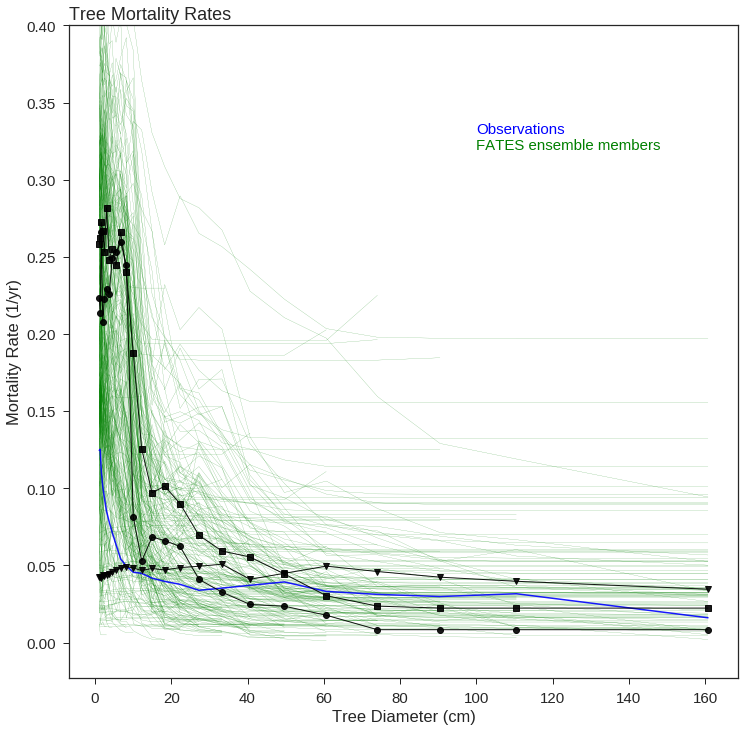

In [72]:
## load census data
mort_rate_inv = fin_bci_inv.variables['mortality_rate_by_size_census'][:,:,1]
mort_rate_inv_mean = mort_rate_inv[1:,:].mean(axis=0)
    
ddbh_inv_error_ll = np.ma.masked_all([2,len(levscls_mid)])
ddbh_inv_error_ul = np.ma.masked_all([2,len(levscls_mid)])
ddbh_inv_error_ll[1,1:] = fin_bci_inv.variables['growth_increment_by_size_census'][3:,:,0].min(axis=0)
ddbh_inv_error_ul[1,1:] = fin_bci_inv.variables['growth_increment_by_size_census'][3:,:,2].max(axis=0)

## FATES
mortality_scls = (histfile1.variables['MORTALITY_CANOPY_SCLS'][:,int(startyear):int(endyear),:,0].mean(axis=1) + 
                 histfile1.variables['MORTALITY_UNDERSTORY_SCLS'][:,int(startyear):int(endyear),:,0].mean(axis=1)
                 ) / nplant_scls_timeave

fig=plt.figure(figsize=(12, 12))

for column in range(nens):
    plt.plot(levscls_mid[1:], mortality_scls[column,1:], marker='', linewidth=0.15, alpha=0.9, color='green')

plt.plot(levscls_mid[1:], mort_rate_inv_mean, marker='', linewidth=1.5, alpha=0.9, color='blue')

# plot selected fates ensemble members
plt.plot(levscls_mid[1:], mortality_scls[85,1:], marker='o', linewidth=1, alpha=0.9, color='black')
plt.plot(levscls_mid[1:], mortality_scls[259,1:], marker='s', linewidth=1, alpha=0.9, color='black')
plt.plot(levscls_mid[1:], mortality_scls[150,1:], marker='v', linewidth=1, alpha=0.9, color='black')

# Add titles
plt.title("Tree Mortality Rates", loc='left')
plt.xlabel("Tree Diameter (cm)")
plt.ylabel("Mortality Rate (1/yr)")
plt.ylim(ymax=0.4)


plt.text(100, 0.33, 'Observations', color ='blue', fontsize=15)
plt.text(100, 0.32, 'FATES ensemble members', color ='green', fontsize=15)